<a href="https://colab.research.google.com/github/cskipper07/Data-Science/blob/main/2_EDA_cranmet_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis: Craniometrics**
* Some outputs have been removed to protect PII and the raw data.

### Import libraries

In [ ]:
pip install dtale

In [ ]:
import dtale

In [ ]:
!pip install --upgrade openpyxl

In [ ]:
pip install scipy numpy seaborn pandas statsmodels pingouin

In [ ]:
!pip install pingouin

In [ ]:
pip install --upgrade pingouin

In [ ]:
# Import libraries
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import os
import statsmodels

In [ ]:
import pingouin as pt

### Set print options

In [ ]:
import sys

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
np.set_printoptions(threshold=sys.maxsize)

### Set export

In [ ]:
from google.colab import  drive
drive.mount('/drive')

Mounted at /drive


### **Input data files:**
*   *cranmet_merged.csv*
*   The merged output file contained the US and Japan merged dfs. It is located in the (Intra)Observer Error folder, and it has had the traits removed with low IO agreement (i.e., Relative TEM < 5)
*   *Comp1_cranmet_for_analysis.xlsx, Comp2_for_analysis.xlsx*
*   *demographics.xlsx*

### Import data

In [ ]:
cranmet = pd.read_csv('cranmet_merged.csv')

In [ ]:
cranmet.head()

In [ ]:
cranmet.tail()

In [ ]:
del cranmet['Sex']
del cranmet['Age']

In [ ]:
demographics = pd.read_excel('demographics.xlsx')

In [ ]:
demographics.head()

In [ ]:
cranmet = pd.merge(cranmet, demographics, on='SkelID')

In [ ]:
cranmet.head()

In [ ]:
# drop unknown columns in cranmet df

cranmet = cranmet.drop(columns=['RFA'], axis=1)
cranmet = cranmet.drop(columns=['RPA'], axis=1)
cranmet = cranmet.drop(columns=['ROA'], axis=1)
cranmet = cranmet.drop(columns=['BSA'], axis=1)
cranmet = cranmet.drop(columns=['SBA'], axis=1)
cranmet = cranmet.drop(columns=['SLA'], axis=1)
cranmet = cranmet.drop(columns=['TBA'], axis=1)
cranmet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       82 non-null     int64  
 1   Collection   82 non-null     object 
 2   GOL          78 non-null     float64
 3   NOL          78 non-null     float64
 4   BNL          81 non-null     float64
 5   BBH          80 non-null     float64
 6   XCB          82 non-null     int64  
 7   XFB          81 non-null     float64
 8   WFB          82 non-null     int64  
 9   ZYB          82 non-null     int64  
 10  ASB          73 non-null     float64
 11  BPL          75 non-null     float64
 12  NPH          74 non-null     float64
 13  NLH          81 non-null     float64
 14  JUB          82 non-null     int64  
 15  NLB          79 non-null     float64
 16  MAB          60 non-null     float64
 17  MAL          74 non-null     float64
 18  MDH          82 non-null     int64  
 19  OBH       

In [ ]:
cranmet.head()

#### Output file: cranmet with demographics

In [ ]:
cranmet.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet.xlsx', index=True)

In [ ]:
cranmet = pd.read_excel('cranmet.xlsx')

In [ ]:
cranmet.head()

In [ ]:
cranmet_VarsOnly = pd.DataFrame(cranmet.iloc[:, 2:74])

In [ ]:
cranmet_VarsOnly.head()

### Find numbers of males and females for each population

#### My data

In [ ]:
cranmet2 = cranmet.groupby('Collection').apply(lambda x: x['Sex'].value_counts())

In [ ]:
print(cranmet2)

In [ ]:
cranmet2.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/cranmet_sex.xlsx')

#### Comp1 data

In [ ]:
Comp1_cranmet = pd.read_excel('Comp1_cranmet_for_analysis.xlsx')

In [ ]:
Comp1_cranmet.head()

In [ ]:
Comp1_cranmet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FDN             2372 non-null   int64  
 1   Contributor No  2372 non-null   object 
 2   Recorder        2297 non-null   object 
 3   Date recorded   1800 non-null   object 
 4   Sex             2372 non-null   object 
 5   Race            2372 non-null   object 
 6   Ethnicity       179 non-null    object 
 7   Birth Year      2155 non-null   object 
 8   GOL             2372 non-null   int64  
 9   NOL             1706 non-null   float64
 10  BNL             2334 non-null   float64
 11  BBH             2334 non-null   float64
 12  XCB             2372 non-null   int64  
 13  XFB             1681 non-null   float64
 14  WFB             2301 non-null   float64
 15  ZYB             2261 non-null   float64
 16  AUB             2257 non-null   float64
 17  ASB             1683 non-null   f

In [ ]:
Comp1_cranmet2 = Comp1_cranmet.groupby('Race').apply(lambda x: x['Sex'].value_counts())
Comp1_cranmet2

Race   
B     M     289
      F     178
EA    M       8
      F       6
H     M     163
      F      36
NAm   M      20
      F      11
W     M    1020
      F     630
W/B   M       3
      F       1
W/H   F       5
      M       2
Name: Sex, dtype: int64

In [ ]:
Comp1_cranmet2.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/Comp1_cranmet_sex.xlsx')

#### Comp2 data

In [ ]:
Comp2 = pd.read_excel('Comp2_for_analysis.xlsx')

In [ ]:
Comp2.head()

In [ ]:
Comp2_2 = Comp2.groupby('Population').apply(lambda x: x['Sex'].value_counts())
print(Comp2_2)

In [ ]:
Comp2_2.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/Comp2_sex.xlsx')

# EDA with d-tale

In [ ]:
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [ ]:
cranmet = pd.read_excel('cranmet.xlsx')

In [ ]:
cranmet.head()

In [ ]:
cranmet_VarsOnly = pd.DataFrame(cranmet.iloc[:, 2:74])

In [ ]:
cranmet_VarsOnly.head()

In [ ]:
cranmet_VarsOnly

In [ ]:
s = cranmet_no_univariate_outliers['NLH']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliersGOL = dict(s[(s < iqr_lower) | (s > iqr_upper)])
print(outliersGOL)
print(iqr_lower)
print(iqr_upper)
print(cranmet_no_univariate_outliers['NLH'].quantile(0.50))
print(cranmet_no_univariate_outliers['NLH'].quantile(0.95))

In [ ]:
dtale.show(cranmet_VarsOnly)

In [ ]:
df = pd.DataFrame(cranmet_VarsOnly)
df.head()

In [ ]:
'''
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import numpy as np
import pandas as pd
import plotly.graph_objs as go

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

s = df[~pd.isnull(df['GOL'])]['GOL']

import scipy.stats as sts
import plotly.express as px

qq_x, qq_y = sts.probplot(s, dist="norm", fit=False)
chart = px.scatter(x=qq_x, y=qq_y, trendline='ols', trendline_color_override='red')
figure = go.Figure(data=chart, layout=go.Layout({
    'legend': {'orientation': 'h'}, 'title': {'text': 'GOL QQ Plot'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
# from plotly.offline import iplot, init_notebook_mode
#
# init_notebook_mode(connected=True)
# chart.pop('id', None) # for some reason iplot does not like 'id'
# iplot(chart)
'''

In [ ]:
cranmet.describe()

,SkelID,Age,GOL,NOL,BNL,BBH,XCB,XFB,WFB,ZYB,ASB,BPL,NPH,NLH,JUB,NLB,MAB,MAL,MDH,OBH,OBB,DKB,NDS,WNB,SIS,ZMB,SSS,FMB,NAS,EKB,DKS,IML,XML,MLS,WMH,GLS,STB,FRC,FRS,PAC,PAS,OCC,OCS,FOL,FOB,NAR,SSR,PRR,DKR,ZOR,FMR,EKR,ZMR,AVR,BRR,VRR,LAR,OSR,MOW,UFBR,UFHT,NAA,PRA,BAA,NBA,BBA,BRA,SSA,NFA,DKA,NDA,FRA,PAA,OCA
count,82.000000,82.000000,78.000000,78.000000,81.000000,80.000000,82.000000,81.000000,82.000000,82.000000,73.000000,75.000000,74.000000,81.000000,82.000000,79.000000,60.000000,74.000000,82.000000,81.000000,79.000000,79.000000,72.000000,80.000000,73.000000,80.000000,79.000000,82.000000,81.000000,81.000000,79.000000,81.000000,81.000000,79.000000,82.000000,81.000000,81.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,82.000000,82.000000,81.000000,81.000000,75.00000,79.000000,81.000000,82.000000,82.000000,81.000000,67.000000,80.000000,79.000000,79.000000,82.000000,74.000000,82.000000,61.000000,75.000000,75.000000,75.000000,79.000000,79.000000,79.000000,79.000000,81.000000,79.000000,72.000000,79.000000,79.000000,79.000000
mean,3183.073171,57.890244,177.038462,174.500000,100.197531,136.862500,141.902439,116.654321,92.182927,132.280488,109.958904,96.013333,69.418919,51.814815,113.256098,25.518987,64.616667,52.756757,34.256098,35.061728,40.632911,19.569620,8.930556,7.741250,2.731507,96.412500,24.063291,97.414634,15.469136,97.703704,10.721519,33.049383,53.592593,13.822785,23.707317,3.925926,112.851852,111.443038,25.582278,110.721519,23.949367,99.620253,28.594937,35.207317,30.426829,93.098765,93.037037,100.24000,82.607595,79.950617,78.048780,72.878049,69.901235,79.820896,121.012500,124.278481,106.227848,40.560976,52.121622,103.621951,72.245902,66.160000,72.573333,41.346667,80.443038,53.443038,46.113924,126.974684,144.814815,149.506329,95.736111,130.430380,133.227848,119.253165
std,1803.013340,24.360972,9.601735,8.847555,5.448440,6.383808,6.557645,5.060041,4.866433,6.467916,5.743205,5.614877,4.566125,3.391575,5.693425,2.105309,4.202871,3.263794,3.650845,2.081740,2.607569,2.279696,1.722481,1.780534,0.931826,5.931452,3.450536,4.340311,2.811078,4.678259,2.745330,3.346271,4.049005,1.899794,2.569949,1.708638,6.469372,5.743998,2.594904,7.438529,3.615844,5.711670,3.646280,2.674700,2.160421,4.983987,5.252248,5.80503,4.258981,3.987171,3.851895,3.834187,4.689363,7.879635,5.232551,5.615767,5.346816,3.800902,5.319781,4.462851,4.617560,3.862642,4.278082,2.738580,2.776951,2.610368,1.908062,7.161103,5.359830,6.970402,12.467414,3.726838,4.714814,5.758980
min,856.000000,17.000000,161.000000,158.000000,90.000000,123.000000,122.000000,104.000000,81.000000,118.000000,95.000000,78.000000,58.000000,42.000000,101.000000,22.000000,55.000000,47.000000,26.000000,30.000000,33.000000,14.000000,6.000000,3.300000,1.100000,81.000000,15.000000,90.000000,10.000000,89.000000,5.000000,24.000000,42.000000,10.000000,17.000000,1.000000,91.000000,100.000000,20.000000,90.000000,15.000000,87.000000,22.000000,26.000000,24.000000,83.000000,78.000000,80.00000,73.000000,72.000000,68.000000,64.000000,60.000000,68.000000,108.000000,113.000000,95.000000,33.000000,40.000000,96.000000,61.000000,54.000000,64.000000,34.000000,74.000000,48.000000,41.000000,109.000000,128.000000,130.000000,67.000000,122.000000,121.000000,103.000000
25%,1748.500000,34.750000,171.000000,169.000000,96.000000,132.000000,137.250000,114.000000,88.250000,128.250000,106.000000,93.000000,66.250000,50.000000,109.000000,24.000000,61.000000,50.000000,32.000000,34.000000,39.000000,18.000000,8.000000,6.475000,2.000000,93.000000,22.000000,94.000000,14.000000,94.000000,9.000000,31.000000,51.000000,13.000000,22.000000,3.000000,108.000000,107.000000,24.000000,106.000000,22.000000,96.000000,26.000000,34.000000,29.000000,90.000000,89.000000,97.00000,80.000000,77.000000,75.000000,70.000000,66.000000,76.000000,118.000000,120.500000,103.000000,38.000000,48.250000,100.000000,69.000000,64.000000,70.000000,39.500000,78.000000,52.000000,45.000000,122.500000,142.000000,145.000000,90.000000,128.000000,129.500000,114.50000

In [ ]:
cranmet.head()

In [ ]:
df.head()

In [ ]:
dtale.show(df)

# EDA with Sweetviz

In [ ]:
pip install sweetviz

In [ ]:
import sweetviz as sv

In [ ]:
advert_report = sv.analyze(cranmet)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
advert_report = sv.analyze(cranmet_VarsOnly)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
advert_report.show_html('cranmet_VarsOnly.html', open_browser=False)

Report cranmet_VarsOnly.html was generated.


In [ ]:
import IPython

In [ ]:
IPython.display.HTML('cranmet_VarsOnly.html')

# **Outliers**
Outliers to possibly remove:
AVR = 133; PRA = 86, 89; FRA = 142


### Univariate outliers
*   Replaced AVR == 133 with the variable median (79)
*   Replaced PRA >= 86 with the variable median (72)

In [ ]:
cranmet.head()

In [ ]:
cranmet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       82 non-null     float64
 1   Collection   82 non-null     object 
 2   GOL          78 non-null     float64
 3   NOL          78 non-null     float64
 4   BNL          81 non-null     float64
 5   BBH          80 non-null     float64
 6   XCB          82 non-null     int64  
 7   XFB          81 non-null     float64
 8   WFB          82 non-null     int64  
 9   ZYB          82 non-null     int64  
 10  ASB          73 non-null     float64
 11  BPL          75 non-null     float64
 12  NPH          74 non-null     float64
 13  NLH          81 non-null     float64
 14  JUB          82 non-null     int64  
 15  NLB          79 non-null     float64
 16  MAB          60 non-null     float64
 17  MAL          74 non-null     float64
 18  MDH          82 non-null     int64  
 19  OBH       

In [ ]:
cranmet_noUVoutliers_VarsOnly = pd.DataFrame(cranmet.iloc[:, 2:74])
cranmet_noUVoutliers_VarsOnly.head()

In [ ]:
percent_missing = cranmet_noUVoutliers_VarsOnly.isnull().sum().sum()*100 / (len(cranmet_noUVoutliers_VarsOnly) * len(cranmet_noUVoutliers_VarsOnly.columns))
percent_missing

4.319105691056911

In [ ]:
for i in cranmet_noUVoutliers_VarsOnly.columns:
    s = cranmet_noUVoutliers_VarsOnly[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
    print(cranmet_noUVoutliers_VarsOnly[i].describe())
    print('Outliers:', outliers)
    print('5th percentile:', cranmet_noUVoutliers_VarsOnly[i].quantile(0.05))
    print('95th percentile:', cranmet_noUVoutliers_VarsOnly[i].quantile(0.95))      # find the variable 95th percentile

    # remove outliers
    cranmet_noUVoutliers_VarsOnly[i] = np.where(cranmet_noUVoutliers_VarsOnly[i] > iqr_upper, np.nan, cranmet_noUVoutliers_VarsOnly[i])   # where any variable value is greater than the lower IQR, replace with NaN
    cranmet_noUVoutliers_VarsOnly[i] = np.where(cranmet_noUVoutliers_VarsOnly[i] < iqr_lower, np.nan, cranmet_noUVoutliers_VarsOnly[i])   # where any variable value is less than the lower IQR, replace with NaN
    print(cranmet_noUVoutliers_VarsOnly[i].describe())
    outliers_updated = dict(s[(s < iqr_lower) | (s > iqr_upper)])
    print('Outliers after removal:', outliers_updated)

count     78.000000
mean     177.038462
std        9.601735
min      161.000000
25%      171.000000
50%      176.000000
75%      183.000000
max      203.000000
Name: GOL, dtype: float64
Outliers: {29: 203.0}
5th percentile: 176.0
95th percentile: 195.14999999999998
count     77.000000
mean     176.701299
std        9.188186
min      161.000000
25%      171.000000
50%      176.000000
75%      183.000000
max      199.000000
Name: GOL, dtype: float64
Outliers after removal: {}
count     78.000000
mean     174.500000
std        8.847555
min      158.000000
25%      169.000000
50%      173.000000
75%      180.750000
max      200.000000
Name: NOL, dtype: float64
Outliers: {29: 200.0}
5th percentile: 173.0
95th percentile: 192.0
count     77.000000
mean     174.168831
std        8.404890
min      158.000000
25%      169.000000
50%      173.000000
75%      180.000000
max      194.000000
Name: NOL, dtype: float64
Outliers after removal: {}
count     81.000000
mean     100.197531
std        5.44

In [ ]:
percent_missing = cranmet_noUVoutliers_VarsOnly.isnull().sum().sum()*100 / (len(cranmet_noUVoutliers_VarsOnly) * len(cranmet_noUVoutliers_VarsOnly.columns))
percent_missing

5.487804878048781

In [ ]:
cranmet_dems = pd.DataFrame()

In [ ]:
cranmet_dems['SkelID'] = cranmet['SkelID']
cranmet_dems['Collection'] = cranmet['Collection']
cranmet_dems['Sex'] = cranmet['Sex']
cranmet_dems['Age'] = cranmet['Age']
cranmet_dems['Population'] = cranmet['Population']
cranmet_dems['Population2'] = cranmet['Population2']
cranmet_dems['Population3'] = cranmet['Population3']
cranmet_dems['Population4'] = cranmet['Population4']

In [ ]:
cranmet_dems.head()

In [ ]:
cranmet_no_univariate_outliers = pd.concat([cranmet_dems, cranmet_noUVoutliers_VarsOnly], axis=1)

In [ ]:
cranmet_no_univariate_outliers.head()

In [ ]:
cranmet_no_univariate_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       82 non-null     int64  
 1   Collection   82 non-null     object 
 2   Sex          82 non-null     object 
 3   Age          82 non-null     int64  
 4   Population   82 non-null     object 
 5   Population2  10 non-null     object 
 6   Population3  5 non-null      object 
 7   Population4  1 non-null      object 
 8   GOL          77 non-null     float64
 9   NOL          77 non-null     float64
 10  BNL          81 non-null     float64
 11  BBH          80 non-null     float64
 12  XCB          81 non-null     float64
 13  XFB          80 non-null     float64
 14  WFB          82 non-null     float64
 15  ZYB          81 non-null     float64
 16  ASB          73 non-null     float64
 17  BPL          72 non-null     float64
 18  NPH          73 non-null     float64
 19  NLH       

#### Output file: no_univariate_outliers

In [ ]:
cranmet_no_univariate_outliers.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_no_univariate_outliers.xlsx', index=False)

##### Old UV outlier code

In [ ]:
# remove outliers by one column at a time
# GOL
'''
s = cranmet_no_univariate_outliers['GOL']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliersGOL = dict(s[(s < iqr_lower) | (s > iqr_upper)])
print(outliersGOL)
print(iqr_lower)
print(iqr_upper)
print(cranmet_no_univariate_outliers['GOL'].quantile(0.50))
print(cranmet_no_univariate_outliers['GOL'].quantile(0.95))
'''

{29: 203.0}
153.0
201.0
176.0
195.14999999999998


In [ ]:
# NLH
'''
s = cranmet_no_univariate_outliers['NLH']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliersNLH = dict(s[(s < iqr_lower) | (s > iqr_upper)])
print(outliersNLH)
print(iqr_lower)
print(iqr_upper)
print(cranmet_no_univariate_outliers['NLH'].quantile(0.50))
print(cranmet_no_univariate_outliers['NLH'].quantile(0.95))
'''

{69: 42.0}
44.0
60.0
52.0
58.0


In [ ]:
# replaced NLH == 133 with the variable median (79)
'''
print(cranmet_no_univariate_outliers['NLH'].quantile(0.50))                              # find the variable median
print(cranmet_no_univariate_outliers['NLH'].quantile(0.95))                              # find the variable 95th percentile
cranmet_no_univariate_outliers['NLH'] = np.where(cranmet_no_univariate_outliers['NLH'] == 42, 52, cranmet_no_univariate_outliers['NLH'])        # where any variable values are equal 133, replace it with the median (79)
cranmet_no_univariate_outliers['NLH'].describe()
'''

52.0
58.0


count    81.000000
mean     51.938272
std       3.206812
min      45.000000
25%      50.000000
50%      52.000000
75%      54.000000
max      60.000000
Name: NLH, dtype: float64

In [ ]:
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

In [ ]:
dtale.show(cranmet_no_univariate_outliers)

In [ ]:
'''
s = cranmet_no_univariate_outliers['AVR']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliersAVR = dict(s[(s < iqr_lower) | (s > iqr_upper)])
outliersAVR
'''

{}

In [ ]:
# replaced AVR == 133 with the variable median (79)
'''
print(cranmet_no_univariate_outliers['AVR'].quantile(0.50))                              # find the variable median
print(cranmet_no_univariate_outliers['AVR'].quantile(0.95))                              # find the variable 95th percentile
cranmet_no_univariate_outliers['AVR'] = np.where(cranmet_no_univariate_outliers['AVR'] == 133, 79, cranmet_no_univariate_outliers['AVR'])        # where any variable values are equal 133, replace it with the median (79)
cranmet_no_univariate_outliers['AVR'].describe()
'''

79.0
85.0


count    67.000000
mean     79.014925
std       4.311691
min      68.000000
25%      76.000000
50%      79.000000
75%      82.000000
max      90.000000
Name: AVR, dtype: float64

In [ ]:
'''
s = cranmet_no_univariate_outliers['PRA']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliersPRA = dict(s[(s < iqr_lower) | (s > iqr_upper)])
outliersPRA
'''

{27: 81.0}

In [ ]:
# replaced PRA >= 86 with the variable median (72)
'''
print(cranmet_no_univariate_outliers['PRA'].quantile(0.50))
print(cranmet_no_univariate_outliers['PRA'].quantile(0.95))
cranmet_no_univariate_outliers['PRA'] = np.where(cranmet_no_univariate_outliers['PRA'] >= 86, 72, cranmet_no_univariate_outliers['PRA'])
cranmet_no_univariate_outliers['PRA'].describe()
'''

72.0
78.0


count    75.000000
mean     72.160000
std       3.472051
min      64.000000
25%      70.000000
50%      72.000000
75%      74.000000
max      81.000000
Name: PRA, dtype: float64

In [ ]:
cranmet_no_univariate_outliers.head()

### Multivariate outliers: Mahalanobis distance

#### Separate US and Japan collections

In [ ]:
cranmet_US = pd.DataFrame(df_cranmet)
cranmet_US = cranmet[cranmet['Collection'] == 'US']

In [ ]:
cranmet_US['Collection'].unique()

In [ ]:
cranmet_Japan = pd.DataFrame(df_cranmet)
cranmet_Japan = cranmet[cranmet['Collection'] == 'Japan']

In [ ]:
cranmet_Japan['Collection'].unique()

In [ ]:
from scipy.spatial import distance

In [ ]:
'''
#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

#create new column in dataframe that contains Mahalanobis distance for each row
df['mahalanobis'] = mahalanobis(x=df, data=df[['score', 'hours', 'prep', 'grade']])

#display first five rows of dataframe
df.head()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

#### Old code

In [ ]:
#df2 = pd.DataFrame(cranmet_VarsOnly)

In [ ]:
#df2 = df2.dropna()

In [ ]:
#df2.head(20)

In [ ]:
'''
df = df.dropna()
df = df.to_numpy()
'''

In [ ]:
'''
# Covariance matrix
covariance  = np.cov(df, rowvar=False)   #  , rowvar=False

# Covariance matrix power of -1
covariance_pm1 = np.linalg.matrix_power(covariance, -1)

# Center point
centerpoint_axis0 = np.mean(df , axis=0)      # centerpoint is being calculated for the columns, which was want because this is finding the center of each column (72 columns) (using data from 33 people/rows)
#centerpoint_axis1 = np.mean(df , axis=1)       # centerpoint is being calculated for the rows
'''

In [ ]:
'''
print(covariance.shape)
print(covariance_pm1.shape)          # this shows the covariance is being calculated using the columns (not rows)
'''

(72, 72)


In [ ]:
'''
print(centerpoint_axis0)
print(len(centerpoint_axis0))
'''

[175.78787879 173.3030303   99.24242424 136.39393939 141.87878788
 116.          91.27272727 131.87878788 109.21212121  96.63636364
  70.09090909  52.36363636 113.06060606  25.60606061  64.63636364
  53.42424242  34.81818182  35.45454545  40.54545455  19.63636364
   8.63636364   7.9          2.58484848  96.57575758  24.39393939
  96.87878788  14.93939394  97.36363636  10.6969697   33.03030303
  53.18181818  14.06060606  23.48484848   3.66666667 112.45454545
 111.66666667  26.27272727 109.84848485  23.66666667  98.60606061
  28.60606061  35.36363636  30.45454545  92.54545455  93.63636364
 101.33333333  82.24242424  79.72727273  78.          72.63636364
  70.09090909  79.09090909 120.48484848 123.60606061 105.27272727
  40.15151515  52.39393939 103.27272727  72.51515152  67.12121212
  70.96969697  41.90909091  80.39393939  53.81818182  45.78787879
 126.45454545 145.75757576 149.6969697   97.87878788 129.39393939
 133.39393939 119.03030303]


In [ ]:
'''
print(len(centerpoint_axis1))
print(centerpoint_axis1)
'''

33


In [ ]:
'''
a = np.array([2, 4, 8])
b = np.array([1, 2, 3])
c = a.T.dot(b)
print(c)
'''

34


In [ ]:
'''
# Distances between center point and
distances = []
for i, val in enumerate(df):
      #print(val)                    # val is a row
      #p1 = df[:, i]
      p1 = val
      p2 = centerpoint_axis0
      #p2 = centerpoint_axis1
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
print(np.array(distances).shape)

distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers
cutoff = chi2.ppf(0.95, df.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print("total outliers {}".format(len(outlierIndexes[0])))
print('--- Index of Outliers ----')
print(outlierIndexes[0])
# array([24, 35, 67, 81])

print('--- Observations found as outlier -----')
print(df[ distances > cutoff , :])
#[[115.  79.], [135.  84.], [122.  89.], [168.  81.]]
'''

(33,)
total outliers 15
--- Index of Outliers ----
[ 1  4  7 10 12 14 16 19 21 24 25 26 28 30 31]
--- Observations found as outlier -----
[[185.  183.  103.  139.  151.  122.   97.  136.  120.  100.   72.   55.
  123.   27.   66.   58.   36.   35.   45.   20.    6.   10.2   3.1 100.
   21.  103.   19.  105.   17.   41.   59.   15.   29.    4.  121.  120.
   27.  112.   24.  106.   35.   34.   30.  100.   97.  105.   92.   85.
   81.   76.   77.   80.  128.  132.  113.   36.   56.  111.   76.   67.
   71.   42.   77.   57.   46.  134.  139.  136.  118.  132.  134.  111. ]
 [178.  178.  104.  135.  135.  114.   94.  129.  105.   99.   74.   55.
  113.   26.   64.   55.   33.   35.   41.   21.   10.   10.9   3.6 104.
   24.   99.   18.   99.   11.   32.   52.   15.   26.    2.  108.  107.
   24.  113.   23.   98.   26.   37.   28.   98.   99.  106.   86.   84.
   81.   76.   75.   83.  118.  121.  106.   39.   56.  106.   77.   65.
   72.   43.   80.   51.   49.  130.  140.  149.   93.  1

In [ ]:
'''
print(np.array(distances).shape)
print(np.array(distances))
'''

(33,)


In [ ]:
'''
outlier_distance = [distances[d] for d in outlierIndexes ]
outlier_distance
'''

[array([ 225.16363636,  293.11943655, 1177.94412879,  785.16212121,
         617.29223485,  363.55132576,   98.62708333,  277.91060606,
         640.10757576,  436.1344697 ,  360.69876894,  144.04829545,
         121.42878788,  153.40625   ,  392.62476326])]

---

In [ ]:
import numpy as np
import pandas as pd
import scipy as stats

#### US Mahalanobis

In [ ]:
cranmet_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       48 non-null     int64  
 1   Collection   48 non-null     object 
 2   GOL          44 non-null     float64
 3   NOL          44 non-null     float64
 4   BNL          47 non-null     float64
 5   BBH          46 non-null     float64
 6   XCB          48 non-null     int64  
 7   XFB          47 non-null     float64
 8   WFB          48 non-null     int64  
 9   ZYB          48 non-null     int64  
 10  ASB          41 non-null     float64
 11  BPL          42 non-null     float64
 12  NPH          41 non-null     float64
 13  NLH          47 non-null     float64
 14  JUB          48 non-null     int64  
 15  NLB          45 non-null     float64
 16  MAB          26 non-null     float64
 17  MAL          41 non-null     float64
 18  MDH          48 non-null     int64  
 19  OBH       

In [ ]:
cranmet_US_VarsOnly = pd.DataFrame(cranmet_US.iloc[:, 2:74])
cranmet_US_VarsOnly.head()

In [ ]:
cranmet_US_VarsOnly_noNAs = cranmet_US_VarsOnly.dropna()

In [ ]:
cranmet_US_VarsOnly_noNAs.head()

#only 17 rows left after dropping NAs

In [ ]:
cranmet_US_VarsOnly_noNAs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 4 to 43
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     17 non-null     float64
 1   NOL     17 non-null     float64
 2   BNL     17 non-null     float64
 3   BBH     17 non-null     float64
 4   XCB     17 non-null     int64  
 5   XFB     17 non-null     float64
 6   WFB     17 non-null     int64  
 7   ZYB     17 non-null     int64  
 8   ASB     17 non-null     float64
 9   BPL     17 non-null     float64
 10  NPH     17 non-null     float64
 11  NLH     17 non-null     float64
 12  JUB     17 non-null     int64  
 13  NLB     17 non-null     float64
 14  MAB     17 non-null     float64
 15  MAL     17 non-null     float64
 16  MDH     17 non-null     int64  
 17  OBH     17 non-null     float64
 18  OBB     17 non-null     float64
 19  DKB     17 non-null     float64
 20  NDS     17 non-null     float64
 21  WNB     17 non-null     float64
 22  SIS 

In [ ]:
#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(cranmet_US_VarsOnly_noNAs)
    if not cov:
        cov = np.cov(cranmet_US_VarsOnly_noNAs.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

column_names = cranmet_US_VarsOnly_noNAs.columns
#create new column in dataframe that contains Mahalanobis distance for each row
cranmet_US_VarsOnly_noNAs['Mahalanobis'] = mahalanobis(x=cranmet_US_VarsOnly_noNAs, data=cranmet_US_VarsOnly_noNAs[column_names])

#display first five rows of dataframe
cranmet_US_VarsOnly_noNAs.head(33)

In [ ]:
from scipy.stats import chi2

#calculate p-value for each mahalanobis distance
cranmet_US_VarsOnly_noNAs['p-value'] = 1 - chi2.cdf(cranmet_US_VarsOnly_noNAs['Mahalanobis'], 71)             # last number is k-1 or #Vars -1. In this df, there are 72 vars, so 72-1 - 71

#display p-values for first five rows in dataframe
cranmet_US_VarsOnly_noNAs.head(30)

In [ ]:
cranmet.head()

In [ ]:
dems = pd.DataFrame(cranmet.iloc[:, 0:2])
dems.head(50)

In [ ]:
cranmet_US_Mahalanobis_outliers = pd.merge(dems, cranmet_US_VarsOnly_noNAs, left_index=True, right_index=True)

In [ ]:
cranmet_US_Mahalanobis_outliers.head(15)

---

#### Japan Mahalanobis

In [ ]:
cranmet_Japan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 48 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       34 non-null     int64  
 1   Collection   34 non-null     object 
 2   GOL          34 non-null     float64
 3   NOL          34 non-null     float64
 4   BNL          34 non-null     float64
 5   BBH          34 non-null     float64
 6   XCB          34 non-null     int64  
 7   XFB          34 non-null     float64
 8   WFB          34 non-null     int64  
 9   ZYB          34 non-null     int64  
 10  ASB          32 non-null     float64
 11  BPL          33 non-null     float64
 12  NPH          33 non-null     float64
 13  NLH          34 non-null     float64
 14  JUB          34 non-null     int64  
 15  NLB          34 non-null     float64
 16  MAB          34 non-null     float64
 17  MAL          33 non-null     float64
 18  MDH          34 non-null     int64  
 19  OBH      

In [ ]:
cranmet_Japan['Collection'].unique()

In [ ]:
cranmet_Japan_VarsOnly = pd.DataFrame(cranmet_Japan.iloc[:, 2:74])
cranmet_Japan_VarsOnly.head()

In [ ]:
cranmet_Japan_VarsOnly_noNAs = cranmet_Japan_VarsOnly.dropna()

In [ ]:
cranmet_Japan_VarsOnly_noNAs.head()

#only 16 rows left after dropping NAs

In [ ]:
cranmet_Japan_VarsOnly_noNAs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 50 to 81
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     16 non-null     float64
 1   NOL     16 non-null     float64
 2   BNL     16 non-null     float64
 3   BBH     16 non-null     float64
 4   XCB     16 non-null     int64  
 5   XFB     16 non-null     float64
 6   WFB     16 non-null     int64  
 7   ZYB     16 non-null     int64  
 8   ASB     16 non-null     float64
 9   BPL     16 non-null     float64
 10  NPH     16 non-null     float64
 11  NLH     16 non-null     float64
 12  JUB     16 non-null     int64  
 13  NLB     16 non-null     float64
 14  MAB     16 non-null     float64
 15  MAL     16 non-null     float64
 16  MDH     16 non-null     int64  
 17  OBH     16 non-null     float64
 18  OBB     16 non-null     float64
 19  DKB     16 non-null     float64
 20  NDS     16 non-null     float64
 21  WNB     16 non-null     float64
 22  SIS

In [ ]:
#create function to calculate Mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(cranmet_Japan_VarsOnly_noNAs)
    if not cov:
        cov = np.cov(cranmet_Japan_VarsOnly_noNAs.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

column_names = cranmet_Japan_VarsOnly_noNAs.columns
#create new column in dataframe that contains Mahalanobis distance for each row
cranmet_Japan_VarsOnly_noNAs['Mahalanobis'] = mahalanobis(x=cranmet_Japan_VarsOnly_noNAs, data=cranmet_Japan_VarsOnly_noNAs[column_names])

#display first five rows of dataframe
cranmet_Japan_VarsOnly_noNAs.head(33)

In [ ]:
from scipy.stats import chi2

#calculate p-value for each mahalanobis distance
cranmet_Japan_VarsOnly_noNAs['p-value'] = 1 - chi2.cdf(cranmet_Japan_VarsOnly_noNAs['Mahalanobis'], 71)             # last number is k-1 or #Vars -1. In this df, there are 72 vars, so 72-1 - 71

#display p-values for first five rows in dataframe
cranmet_Japan_VarsOnly_noNAs.head(30)

In [ ]:
cranmet.tail()

In [ ]:
#dems = pd.DataFrame(cranmet.iloc[:, 0:2])
dems.tail(50)

In [ ]:
cranmet_Japan_Mahalanobis_outliers = pd.merge(dems, cranmet_Japan_VarsOnly_noNAs, left_index=True, right_index=True)

In [ ]:
cranmet_Japan_Mahalanobis_outliers.head(15)

### Re-merge US and Japan outliers

In [ ]:
cranmet_Mahalanobis_outliers = cranmet_US_Mahalanobis_outliers.append(cranmet_Japan_Mahalanobis_outliers)

In [ ]:
cranmet_Mahalanobis_outliers.head()

In [ ]:
cranmet_Mahalanobis_outliers.tail()

#### Output file: Mahalanobis

In [ ]:
cranmet_Mahalanobis_outliers.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_Mahalanobis_outliers.xlsx', index=True)

### Remove outliers

In [ ]:
cranmet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       82 non-null     int64  
 1   Collection   82 non-null     object 
 2   GOL          78 non-null     float64
 3   NOL          78 non-null     float64
 4   BNL          81 non-null     float64
 5   BBH          80 non-null     float64
 6   XCB          82 non-null     int64  
 7   XFB          81 non-null     float64
 8   WFB          82 non-null     int64  
 9   ZYB          82 non-null     int64  
 10  ASB          73 non-null     float64
 11  BPL          75 non-null     float64
 12  NPH          74 non-null     float64
 13  NLH          81 non-null     float64
 14  JUB          82 non-null     int64  
 15  NLB          79 non-null     float64
 16  MAB          60 non-null     float64
 17  MAL          74 non-null     float64
 18  MDH          82 non-null     int64  
 19  OBH       

In [ ]:
cranmet_no_outliers = pd.DataFrame(cranmet)

In [ ]:
cranmet_no_outliers.head()

In [ ]:
cranmet_no_outliers.drop([4, 31, 33, 39, 40, 43, 58, 62], inplace=True)

In [ ]:
cranmet_no_outliers.tail(50)

#### Output file: no_outliers

In [ ]:
cranmet_no_outliers.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_no_outliers.xlsx', index=True)

---

# **Normality**
*   Visualized using histograms and Q-Q plots from the Sweetviz and d-tale packages
*   Shapiro-Wilk: shapiro function from the stats subpackage of the Scipy library
*   Kolmogorov-Smirnov: kstest function from the stats subpackage of the Scipy library

In [ ]:
cranmet_no_univariate_outliers = pd.read_excel('cranmet_no_univariate_outliers.xlsx')

In [ ]:
cranmet_no_univariate_outliers.head()

In [ ]:
cranmet_US = pd.DataFrame()
cranmet_US = cranmet_no_univariate_outliers[cranmet_no_univariate_outliers['Collection'] == 'US']

In [ ]:
cranmet_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       48 non-null     int64  
 1   Collection   48 non-null     object 
 2   GOL          44 non-null     float64
 3   NOL          44 non-null     float64
 4   BNL          47 non-null     float64
 5   BBH          46 non-null     float64
 6   XCB          48 non-null     int64  
 7   XFB          47 non-null     float64
 8   WFB          48 non-null     int64  
 9   ZYB          48 non-null     int64  
 10  ASB          41 non-null     float64
 11  BPL          42 non-null     float64
 12  NPH          41 non-null     float64
 13  NLH          47 non-null     float64
 14  JUB          48 non-null     int64  
 15  NLB          45 non-null     float64
 16  MAB          26 non-null     float64
 17  MAL          41 non-null     float64
 18  MDH          48 non-null     int64  
 19  OBH       

In [ ]:
cranmet_US_VarsOnly = pd.DataFrame(cranmet_US.iloc[:, 2:74])

In [ ]:
cranmet_US_VarsOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     44 non-null     float64
 1   NOL     44 non-null     float64
 2   BNL     47 non-null     float64
 3   BBH     46 non-null     float64
 4   XCB     48 non-null     int64  
 5   XFB     47 non-null     float64
 6   WFB     48 non-null     int64  
 7   ZYB     48 non-null     int64  
 8   ASB     41 non-null     float64
 9   BPL     42 non-null     float64
 10  NPH     41 non-null     float64
 11  NLH     47 non-null     float64
 12  JUB     48 non-null     int64  
 13  NLB     45 non-null     float64
 14  MAB     26 non-null     float64
 15  MAL     41 non-null     float64
 16  MDH     48 non-null     int64  
 17  OBH     47 non-null     float64
 18  OBB     45 non-null     float64
 19  DKB     45 non-null     float64
 20  NDS     43 non-null     float64
 21  WNB     46 non-null     float64
 22  SIS 

### Shapiro-Wilks test

#### US

In [ ]:
cranmet_US_VarsOnly_shapiro = cranmet_US_VarsOnly.dropna()

##### for i in df.columns:
This code will treat i as the column names:
*   for i in cranmet_US_VarsOnly_shapiro.columns:


In [ ]:
for i in cranmet_US_VarsOnly_shapiro.columns:
  print(i)
  '''
  US_shapiro = stats.shapiro(cranmet_US_VarsOnly_shapiro[i])
  print(US_shapiro)
  '''

##### for i in range(len(df.columns):
This code will treat i as the index of the columns:
*   for i in range(len(cranmet_US_VarsOnly_shapiro.columns)):

In [ ]:
for i in range(len(cranmet_US_VarsOnly_shapiro.columns)):
  print(i)
  '''
  US_shapiro = stats.shapiro(cranmet_US_VarsOnly_shapiro[i])
  print(US_shapiro)
  '''

In [ ]:
for i in cranmet_US_VarsOnly_shapiro.columns:
  US_shapiro = stats.shapiro(cranmet_US_VarsOnly_shapiro[i])
  print(US_shapiro)

In [ ]:
# Shapiro-Wilks test for normality

def run_shapiro(my_US_shapiro_df, index):
    column1 = list(cranmet_US_VarsOnly_shapiro.columns)
    #print(column1)
    y = stats.shapiro(cranmet_US_VarsOnly_shapiro[column1[i]])    #y is a dictionary where the t-test returns a dictionary

    #print(y)

    return y
    '''
    my_str = ''
    #my_ind_t_test_df = pd.DataFrame()
    stats = []
    values = []
    #print(y)
    for k in y:
        stats.append(k)
        values.append(y[k][0])           # k is the column value; 0 is the row value - used to locate the values -> new df(i.e., y)
    my_ind_t_test_df['stats'] = stats
    #print(column1[index])
    my_ind_t_test_df[column2[index]] = values
    #my_ind_t_test_df.head(10)
    #print(my_str)
    #print(y['T'][0], '\t', y['dof'][0], '\t', y['tail'][0], '\t', y['p-val'][0]\
    #      ,'\t',y['CI95%'][0],'\t', y['cohen-d'][0],'\t',y['BF10'][0], '\t',y['power'][0])#['T'])#[0])
    '''

In [ ]:
print(y)
print(y[0])
print(y[1])

ShapiroResult(statistic=0.9009810090065002, pvalue=0.05976490676403046)
0.9009810090065002
0.05976490676403046


In [ ]:
stats.shapiro(cranmet_US_VarsOnly_shapiro['GOL'])

ShapiroResult(statistic=0.8843582272529602, pvalue=0.03743640333414078)

In [ ]:
column1 = list(cranmet_US_VarsOnly_shapiro.columns)
column_names = ('Trait Code', 'Shapiro statistic', 'p-value')
my_US_shapiro_df = pd.DataFrame(columns = column_names)
for i in range(len(column1)):
    #print(column1[i])
    US_shapiro = run_shapiro(my_US_shapiro_df, i)
    print(column1[i], '\t', US_shapiro[0], US_shapiro[1])
    df3 = {'Trait Code': column1[i], 'Shapiro statistic': US_shapiro[0], 'p-value': US_shapiro[1]}
    my_US_shapiro_df.loc[i] = [column1[i], US_shapiro[0], US_shapiro[1]]
#cranmet_US_VarsOnly_shapiro.isnull().sum().sum()

GOL 	 0.8843582272529602 0.03743640333414078
NOL 	 0.9148274660110474 0.1207195520401001
BNL 	 0.9536256194114685 0.5163149833679199
BBH 	 0.9413013458251953 0.33394259214401245
XCB 	 0.9722846746444702 0.8571075201034546
XFB 	 0.953727662563324 0.5180661082267761
WFB 	 0.9098564386367798 0.09948119521141052
ZYB 	 0.9427011013031006 0.3516298830509186
ASB 	 0.9764108657836914 0.9175636768341064
BPL 	 0.8921851515769958 0.050347909331321716
NPH 	 0.9615569114685059 0.6609094142913818
NLH 	 0.9490634799003601 0.44187799096107483
JUB 	 0.9526639580726624 0.49999070167541504
NLB 	 0.952052891254425 0.48978832364082336
MAB 	 0.9453282356262207 0.3869296610355377
MAL 	 0.9410304427146912 0.3306080102920532
MDH 	 0.9182367920875549 0.13787123560905457
OBH 	 0.8336781859397888 0.006105815526098013
OBB 	 0.9211816191673279 0.15462777018547058
DKB 	 0.9675561785697937 0.7743622064590454
NDS 	 0.9472625255584717 0.4146895706653595
WNB 	 0.94027179479599 0.32142215967178345
SIS 	 0.949319243431091

In [ ]:
my_US_shapiro_df.head()

,Trait Code,Shapiro statistic,p-value
0,GOL,0.884358,0.037436
1,NOL,0.914827,0.120720
2,BNL,0.953626,0.516315
3,BBH,0.941301,0.333943
4,XCB,0.972285,0.857108


#### Japan

In [ ]:
cranmet_no_univariate_outliers.tail()

In [ ]:
cranmet_Japan = pd.DataFrame()
cranmet_Japan = cranmet_no_univariate_outliers[cranmet_no_univariate_outliers['Collection'] == 'Japan']

In [ ]:
cranmet_Japan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 48 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       34 non-null     int64  
 1   Collection   34 non-null     object 
 2   GOL          34 non-null     float64
 3   NOL          34 non-null     float64
 4   BNL          34 non-null     float64
 5   BBH          34 non-null     float64
 6   XCB          34 non-null     int64  
 7   XFB          34 non-null     float64
 8   WFB          34 non-null     int64  
 9   ZYB          34 non-null     int64  
 10  ASB          32 non-null     float64
 11  BPL          33 non-null     float64
 12  NPH          33 non-null     float64
 13  NLH          34 non-null     float64
 14  JUB          34 non-null     int64  
 15  NLB          34 non-null     float64
 16  MAB          34 non-null     float64
 17  MAL          33 non-null     float64
 18  MDH          34 non-null     int64  
 19  OBH      

In [ ]:
cranmet_Japan_VarsOnly = pd.DataFrame(cranmet_Japan.iloc[:, 2:74])

In [ ]:
cranmet_Japan_VarsOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 48 to 81
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     34 non-null     float64
 1   NOL     34 non-null     float64
 2   BNL     34 non-null     float64
 3   BBH     34 non-null     float64
 4   XCB     34 non-null     int64  
 5   XFB     34 non-null     float64
 6   WFB     34 non-null     int64  
 7   ZYB     34 non-null     int64  
 8   ASB     32 non-null     float64
 9   BPL     33 non-null     float64
 10  NPH     33 non-null     float64
 11  NLH     34 non-null     float64
 12  JUB     34 non-null     int64  
 13  NLB     34 non-null     float64
 14  MAB     34 non-null     float64
 15  MAL     33 non-null     float64
 16  MDH     34 non-null     int64  
 17  OBH     34 non-null     float64
 18  OBB     34 non-null     float64
 19  DKB     34 non-null     float64
 20  NDS     29 non-null     float64
 21  WNB     34 non-null     float64
 22  SIS

In [ ]:
cranmet_Japan_VarsOnly_shapiro = cranmet_Japan_VarsOnly.dropna()

In [ ]:
for i in cranmet_Japan_VarsOnly_shapiro.columns:
  Japan_shapiro = stats.shapiro(cranmet_Japan_VarsOnly_shapiro[i])
  print(Japan_shapiro)

(0.9404165148735046, 0.35414719581604004)
(0.9521161913871765, 0.5239389538764954)
(0.8634079694747925, 0.02159048803150654)
(0.9781115055084229, 0.9468322992324829)
(0.9037806391716003, 0.09241186082363129)
(0.9667233228683472, 0.7831470370292664)
(0.9268772006034851, 0.2174452543258667)
(0.9165050983428955, 0.14817050099372864)
(0.9351180195808411, 0.2934417724609375)
(0.9577207565307617, 0.6206873655319214)
(0.9254940748214722, 0.20665913820266724)
(0.9799447655677795, 0.9631621837615967)
(0.8702504634857178, 0.02743663266301155)
(0.93578040599823, 0.3004954755306244)
(0.9111632108688354, 0.12150648981332779)
(0.9767535328865051, 0.9325857758522034)
(0.9681993722915649, 0.8086639642715454)
(0.9305518269538879, 0.24874559044837952)
(0.9235812425613403, 0.1925826370716095)
(0.9879316091537476, 0.9974244236946106)
(0.9220325946807861, 0.18186849355697632)
(0.8641831874847412, 0.022181173786520958)
(0.9728971123695374, 0.8830698132514954)
(0.7137389183044434, 0.00024009552726056427)
(0.

In [ ]:
# Shapiro-Wilks test for normality

def run_shapiro(my_Japan_shapiro_df, index):
    column1 = list(cranmet_Japan_VarsOnly_shapiro.columns)
    #print(column1)
    y = stats.shapiro(cranmet_Japan_VarsOnly_shapiro[column1[i]])    #y is a dictionary where the t-test returns a dictionary

    #print(y)

    return y
    '''
    my_str = ''
    #my_ind_t_test_df = pd.DataFrame()
    stats = []
    values = []
    #print(y)
    for k in y:
        stats.append(k)
        values.append(y[k][0])           # k is the column value; 0 is the row value - used to locate the values -> new df(i.e., y)
    my_ind_t_test_df['stats'] = stats
    #print(column1[index])
    my_ind_t_test_df[column2[index]] = values
    #my_ind_t_test_df.head(10)
    #print(my_str)
    #print(y['T'][0], '\t', y['dof'][0], '\t', y['tail'][0], '\t', y['p-val'][0]\
    #      ,'\t',y['CI95%'][0],'\t', y['cohen-d'][0],'\t',y['BF10'][0], '\t',y['power'][0])#['T'])#[0])
    '''

In [ ]:
print(y)
print(y[0])
print(y[1])

ShapiroResult(statistic=0.9009810090065002, pvalue=0.05976490676403046)
0.9009810090065002
0.05976490676403046


In [ ]:
stats.shapiro(cranmet_Japan_VarsOnly_shapiro['GOL'])

ShapiroResult(statistic=0.9404165148735046, pvalue=0.35414719581604004)

In [ ]:
column1 = list(cranmet_Japan_VarsOnly_shapiro.columns)
column_names = ('Trait Code', 'Shapiro statistic', 'p-value')
my_Japan_shapiro_df = pd.DataFrame(columns = column_names)
for i in range(len(column1)):
    #print(column1[i])
    Japan_shapiro = run_shapiro(my_Japan_shapiro_df, i)
    print(column1[i], '\t', Japan_shapiro[0], Japan_shapiro[1])
    df4 = {'Trait Code': column1[i], 'Shapiro statistic': Japan_shapiro[0], 'p-value': Japan_shapiro[1]}
    my_Japan_shapiro_df.loc[i] = [column1[i], Japan_shapiro[0], Japan_shapiro[1]]
#cranmet_Japan_VarsOnly_shapiro.isnull().sum().sum()

GOL 	 0.9404165148735046 0.35414719581604004
NOL 	 0.9521161913871765 0.5239389538764954
BNL 	 0.8634079694747925 0.02159048803150654
BBH 	 0.9781115055084229 0.9468322992324829
XCB 	 0.9037806391716003 0.09241186082363129
XFB 	 0.9667233228683472 0.7831470370292664
WFB 	 0.9268772006034851 0.2174452543258667
ZYB 	 0.9165050983428955 0.14817050099372864
ASB 	 0.9351180195808411 0.2934417724609375
BPL 	 0.9577207565307617 0.6206873655319214
NPH 	 0.9254940748214722 0.20665913820266724
NLH 	 0.9799447655677795 0.9631621837615967
JUB 	 0.8702504634857178 0.02743663266301155
NLB 	 0.93578040599823 0.3004954755306244
MAB 	 0.9111632108688354 0.12150648981332779
MAL 	 0.9767535328865051 0.9325857758522034
MDH 	 0.9681993722915649 0.8086639642715454
OBH 	 0.9305518269538879 0.24874559044837952
OBB 	 0.9235812425613403 0.1925826370716095
DKB 	 0.9879316091537476 0.9974244236946106
NDS 	 0.9220325946807861 0.18186849355697632
WNB 	 0.8641831874847412 0.022181173786520958
SIS 	 0.972897112369537

In [ ]:
my_Japan_shapiro_df.head()

,Trait Code,Shapiro statistic,p-value
0,GOL,0.940417,0.354147
1,NOL,0.952116,0.523939
2,BNL,0.863408,0.021590
3,BBH,0.978112,0.946832
4,XCB,0.903781,0.092412


#### Output file: Shapiro-Wilks normality
These files contain the Shapiro-Wilks results for US and Japan separately. The two Shapiro-Wilks results files were merged into one table in excel.

In [ ]:
my_US_shapiro_df.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_US_shapiro_results.xlsx', index=False)

In [ ]:
my_Japan_shapiro_df.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_Japan_shapiro_results.xlsx', index=False)

---

# **Sexual dimorphism**
*   *t*-tests
*   Sexual dimorphism equation from Garn (1967)

### *t*-test
*   Using Pinguoin package. See for more information: https://www.marsja.se/how-to-use-python-to-perform-a-paired-sample-t-test/
*   If the Pingouin package isn't loading, use the ttest_ind from scipy.stats

In [ ]:
from scipy import stats

In [ ]:
cranmet2 = pd.read_excel('cranmet_no_univariate_outliers.xlsx')

In [ ]:
cranmet2.head()

In [ ]:
cranmet2['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
females = pd.DataFrame()
females = cranmet2[cranmet2['Sex'] == 'F']

In [ ]:
females.head()

In [ ]:
del females['SkelID']
del females['Collection']
del females['Sex']
del females['Age']
del females['Population']
del females['Population2']
del females['Population3']
del females['Population4']

In [ ]:
females.head()

In [ ]:
males = pd.DataFrame()
males = cranmet2[cranmet2['Sex'] == 'M']

In [ ]:
males.head()

In [ ]:
del males['SkelID']
del males['Collection']
del males['Sex']
del males['Age']
del males['Population']
del males['Population2']
del males['Population3']
del males['Population4']

In [ ]:
males.head()

#### Shapiro-Wilks test

In [ ]:
'''
column_names = ['Trait Code', 'Shapiro-Wilks', 'p-value']
females_shapiro = pd.DataFrame(column_names)
column1 = list(females.columns)

for i in range(len(column1)):
  y = stats.shapiro(females[i])
  print(y)
  '''

##### Females

In [ ]:
'''
# Independent samples t-test: Option 1 (iteratively drop NAs)

#len(females[females.columns[3]])
column_names = ('Trait Code', 'Shapiro statistic', 'p-value')
my_females_shapiro_df = pd.DataFrame(columns = column_names)
for c in females.columns:
    temp_df_females = pd.DataFrame(females[c])                                                # initialize a new df using one column [c] of the females df one at a time
    temp_df_females.dropna(subset=[c], inplace=True)
    if len(temp_df_females) <3:                                                             # cannot run with 3 or less inputs
      continue
    females_shapiro = stats.shapiro(females[c])
    print(c,'\t', females_shapiro)
    #df3 = {'Trait Code': [c], 'Shapiro statistic': females_shapiro[0], 'p-value': females_shapiro[1]}
    my_females_shapiro_df.loc[c] = [c, females_shapiro[0], females_shapiro[1]]
    '''

In [ ]:
# for Independent samples t-test: Option 1 (drop all NAs in the entire df)
females = females.dropna()

In [ ]:
for i in females.columns:
  females_shapiro = stats.shapiro(females[i])
  print(females_shapiro)

(0.9656608700752258, 0.7132828831672668)
(0.9281901121139526, 0.1804489642381668)
(0.9050848484039307, 0.07050691545009613)
(0.9374593496322632, 0.2620552182197571)
(0.9354389309883118, 0.2417566180229187)
(0.952790379524231, 0.47045275568962097)
(0.9693188667297363, 0.7847852110862732)
(0.9387113451957703, 0.2754051983356476)
(0.9797374606132507, 0.947262704372406)
(0.973545491695404, 0.8610700964927673)
(0.9405384659767151, 0.295990526676178)
(0.9171695113182068, 0.11517993360757828)
(0.8585861921310425, 0.011601376347243786)
(0.960186243057251, 0.6052311658859253)
(0.9367424845695496, 0.25467950105667114)
(0.9608269333839417, 0.6176756620407104)
(0.9580017924308777, 0.5635577440261841)
(0.9367168545722961, 0.2544195353984833)
(0.8987431526184082, 0.05463489890098572)
(0.9731903672218323, 0.8550739288330078)
(0.910308301448822, 0.0871170312166214)
(0.9083704948425293, 0.08053093403577805)
(0.9764012694358826, 0.9055410623550415)
(0.9392030835151672, 0.2808152139186859)
(0.96405506134

In [ ]:
# stats.shapiro(females['GOL'])

ShapiroResult(statistic=0.9656608700752258, pvalue=0.7132828831672668)

In [ ]:
# Shapiro-Wilks test for normality

def run_shapiro(my_females_shapiro_df, index):
    column1 = list(females.columns)
    #print(column1)
    y = stats.shapiro(females[column1[i]])    #y is a dictionary where the t-test returns a dictionary

    #print(y)

    return y
    '''
    my_str = ''
    #my_ind_t_test_df = pd.DataFrame()
    stats = []
    values = []
    #print(y)
    for k in y:
        stats.append(k)
        values.append(y[k][0])           # k is the column value; 0 is the row value - used to locate the values -> new df(i.e., y)
    my_ind_t_test_df['stats'] = stats
    #print(column1[index])
    my_ind_t_test_df[column2[index]] = values
    #my_ind_t_test_df.head(10)
    #print(my_str)
    #print(y['T'][0], '\t', y['dof'][0], '\t', y['tail'][0], '\t', y['p-val'][0]\
    #      ,'\t',y['CI95%'][0],'\t', y['cohen-d'][0],'\t',y['BF10'][0], '\t',y['power'][0])#['T'])#[0])
    '''

In [ ]:
print(y)
print(y[0])
print(y[1])

ShapiroResult(statistic=0.9009810090065002, pvalue=0.05976490676403046)
0.9009810090065002
0.05976490676403046


In [ ]:
stats.shapiro(females['GOL'])

ShapiroResult(statistic=0.9656608700752258, pvalue=0.7132828831672668)

In [ ]:
column1 = list(females.columns)
column_names = ('Trait Code', 'Shapiro statistic', 'p-value')
my_females_shapiro_df = pd.DataFrame(columns = column_names)
for i in range(len(column1)):
    #print(column1[i])
    females_shapiro = run_shapiro(my_females_shapiro_df, i)
    print(column1[i], '\t', females_shapiro[0], females_shapiro[1])
    df3 = {'Trait Code': column1[i], 'Shapiro statistic': females_shapiro[0], 'p-value': females_shapiro[1]}
    my_females_shapiro_df.loc[i] = [column1[i], females_shapiro[0], females_shapiro[1]]
#females.isnull().sum().sum()

In [ ]:
my_females_shapiro_df.head()

,Trait Code,Shapiro statistic,p-value
0,GOL,0.965661,0.713283
1,NOL,0.928190,0.180449
2,BNL,0.905085,0.070507
3,BBH,0.937459,0.262055
4,XCB,0.935439,0.241757


##### Males

In [ ]:
males = males.dropna()

In [ ]:
stats.shapiro(males)

ShapiroResult(statistic=0.9718644022941589, pvalue=1.2503823117963192e-13)

In [ ]:
for i in males.columns:
  males_shapiro = stats.shapiro(males[i])
  print(males_shapiro)

ShapiroResult(statistic=0.931930661201477, pvalue=0.29156404733657837)
ShapiroResult(statistic=0.9379737973213196, pvalue=0.35757508873939514)
ShapiroResult(statistic=0.9682093262672424, pvalue=0.8307067155838013)
ShapiroResult(statistic=0.945939302444458, pvalue=0.4629105031490326)
ShapiroResult(statistic=0.9624447822570801, pvalue=0.7347967028617859)
ShapiroResult(statistic=0.9599733948707581, pvalue=0.6919338703155518)
ShapiroResult(statistic=0.9402332305908203, pvalue=0.3853120803833008)
ShapiroResult(statistic=0.9342199563980103, pvalue=0.3152010142803192)
ShapiroResult(statistic=0.9483640193939209, pvalue=0.4990633726119995)
ShapiroResult(statistic=0.8524080514907837, pvalue=0.018787385895848274)
ShapiroResult(statistic=0.9568802118301392, pvalue=0.6383745074272156)
ShapiroResult(statistic=0.9785056114196777, pvalue=0.958276093006134)
ShapiroResult(statistic=0.9517092704772949, pvalue=0.5517653822898865)
ShapiroResult(statistic=0.9570407867431641, pvalue=0.6411356329917908)
Shapi

In [ ]:
# Shapiro-Wilks test for normality

def run_shapiro(my_males_shapiro_df, index):
    column1 = list(males.columns)
    #print(column1)
    y = stats.shapiro(males[column1[i]])    #y is a dictionary where the t-test returns a dictionary

    #print(y)

    return y
    '''
    my_str = ''
    #my_ind_t_test_df = pd.DataFrame()
    stats = []
    values = []
    #print(y)
    for k in y:
        stats.append(k)
        values.append(y[k][0])           # k is the column value; 0 is the row value - used to locate the values -> new df(i.e., y)
    my_ind_t_test_df['stats'] = stats
    #print(column1[index])
    my_ind_t_test_df[column2[index]] = values
    #my_ind_t_test_df.head(10)
    #print(my_str)
    #print(y['T'][0], '\t', y['dof'][0], '\t', y['tail'][0], '\t', y['p-val'][0]\
    #      ,'\t',y['CI95%'][0],'\t', y['cohen-d'][0],'\t',y['BF10'][0], '\t',y['power'][0])#['T'])#[0])
    '''

In [ ]:
print(y)
print(y[0])
print(y[1])

ShapiroResult(statistic=0.9009810090065002, pvalue=0.05976490676403046)
0.9009810090065002
0.05976490676403046


In [ ]:
stats.shapiro(males['GOL'])

ShapiroResult(statistic=0.931930661201477, pvalue=0.29156404733657837)

In [ ]:
column1 = list(males.columns)
column_names = ('Trait Code', 'Shapiro statistic', 'p-value')
my_males_shapiro_df = pd.DataFrame(columns = column_names)
for i in range(len(column1)):
    #print(column1[i])
    males_shapiro = run_shapiro(my_males_shapiro_df, i)
    print(column1[i], '\t', males_shapiro[0], males_shapiro[1])
    df3 = {'Trait Code': column1[i], 'Shapiro statistic': males_shapiro[0], 'p-value': males_shapiro[1]}
    my_males_shapiro_df.loc[i] = [column1[i], males_shapiro[0], males_shapiro[1]]
#females.isnull().sum().sum()

GOL 	 0.931930661201477 0.29156404733657837
NOL 	 0.9379737973213196 0.35757508873939514
BNL 	 0.9682093262672424 0.8307067155838013
BBH 	 0.945939302444458 0.4629105031490326
XCB 	 0.9624447822570801 0.7347967028617859
XFB 	 0.9599733948707581 0.6919338703155518
WFB 	 0.9402332305908203 0.3853120803833008
ZYB 	 0.9342199563980103 0.3152010142803192
ASB 	 0.9483640193939209 0.4990633726119995
BPL 	 0.8524080514907837 0.018787385895848274
NPH 	 0.9568802118301392 0.6383745074272156
NLH 	 0.9785056114196777 0.958276093006134
JUB 	 0.9517092704772949 0.5517653822898865
NLB 	 0.9570407867431641 0.6411356329917908
MAB 	 0.9029170274734497 0.10546627640724182
MAL 	 0.9525526165962219 0.5655150413513184
MDH 	 0.9525858163833618 0.5660596489906311
OBH 	 0.904499351978302 0.1115160584449768
OBB 	 0.9081605672836304 0.1268950253725052
DKB 	 0.963337242603302 0.7501477003097534
NDS 	 0.8599746227264404 0.024112604558467865
WNB 	 0.9686570763587952 0.8376913666725159
SIS 	 0.9516656994819641 0.551

In [ ]:
my_males_shapiro_df.head()

,Trait Code,Shapiro statistic,p-value
0,GOL,0.931931,0.291564
1,NOL,0.937974,0.357575
2,BNL,0.968209,0.830707
3,BBH,0.945939,0.462911
4,XCB,0.962445,0.734797


##### Output file: Shapiro-Wilks females/males normality
These files contain the Shapiro-Wilks results for females and males separately. The two Shapiro-Wilks results files were merged into one table in excel.

In [ ]:
my_females_shapiro_df.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_females_shapiro_results.xlsx', index=False)

In [ ]:
my_males_shapiro_df.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_males_shapiro_results.xlsx', index=False)

#### Levene test: homogeneity of variances

In [ ]:
for i in males.columns:
  levene = stats.levene(males[i], females[i])
  print(levene)

LeveneResult(statistic=5.693405315326261, pvalue=0.023320472381878333)
LeveneResult(statistic=5.560035845819693, pvalue=0.024863783405698142)
LeveneResult(statistic=0.2669746683561904, pvalue=0.6090352396332921)
LeveneResult(statistic=0.08367783184193284, pvalue=0.7742996689110083)
LeveneResult(statistic=0.2127737344856716, pvalue=0.6478223048531999)
LeveneResult(statistic=2.05325257196915, pvalue=0.1618899066004459)
LeveneResult(statistic=0.03706109143859408, pvalue=0.8485963555527869)
LeveneResult(statistic=1.085526207443343, pvalue=0.30552228174617796)
LeveneResult(statistic=0.005162687095363954, pvalue=0.9431813894467937)
LeveneResult(statistic=0.056564660108445186, pvalue=0.8135753953443905)
LeveneResult(statistic=1.581357164544016, pvalue=0.21795651043346592)
LeveneResult(statistic=1.7623668389410394, pvalue=0.19402341264174283)
LeveneResult(statistic=0.6257476076555029, pvalue=0.43493011714742913)
LeveneResult(statistic=0.1332923832923835, pvalue=0.7175216618942128)
LeveneResult

In [ ]:
# Levene test for normality

def run_levene_test(my_levene_df, index):
    column1 = list(females.columns)
    column2 = list(males.columns)

    y = stats.levene(females[column1[index]], males[column2[index]])

    #print(y)

    return y
    '''
    my_str = ''
    #my_ind_t_test_df = pd.DataFrame()
    stats = []
    values = []
    #print(y)
    for k in y:
        stats.append(k)
        values.append(y[k][0])           # k is the column value; 0 is the row value - used to locate the values -> new df(i.e., y)
    my_ind_t_test_df['stats'] = stats
    #print(column1[index])
    my_ind_t_test_df[column2[index]] = values
    #my_ind_t_test_df.head(10)
    #print(my_str)
    #print(y['T'][0], '\t', y['dof'][0], '\t', y['tail'][0], '\t', y['p-val'][0]\
    #      ,'\t',y['CI95%'][0],'\t', y['cohen-d'][0],'\t',y['BF10'][0], '\t',y['power'][0])#['T'])#[0])
    '''

In [ ]:
column1 = list(females.columns)
column_names = ('Trait Code', 'Levene statistic', 'p-value')
my_levene_df = pd.DataFrame(columns = column_names)
for i in range(len(column1)):
    levene_output = run_levene_test(my_levene_df, i)
    print(column1[i], '\t', levene_output[0], levene_output[1])
    df2 = {'Trait Code': column1[i], 'Levene statistic': levene_output[0], 'p-value': levene_output[1]}
    my_levene_df.loc[i] = [column1[i], levene_output[0], levene_output[1]]
#females.isnull().sum().sum()

GOL 	 5.693405315326261 0.023320472381878333
NOL 	 5.560035845819693 0.024863783405698142
BNL 	 0.2669746683561904 0.6090352396332921
BBH 	 0.08367783184193284 0.7742996689110083
XCB 	 0.2127737344856716 0.6478223048531999
XFB 	 2.05325257196915 0.1618899066004459
WFB 	 0.03706109143859408 0.8485963555527869
ZYB 	 1.085526207443343 0.30552228174617796
ASB 	 0.005162687095363954 0.9431813894467937
BPL 	 0.056564660108445186 0.8135753953443905
NPH 	 1.581357164544016 0.21795651043346592
NLH 	 1.7623668389410394 0.19402341264174283
JUB 	 0.6257476076555029 0.43493011714742913
NLB 	 0.1332923832923835 0.7175216618942128
MAB 	 0.8946439991244294 0.35153665945371704
MAL 	 0.507818317200297 0.48141457996083126
MDH 	 0.7687394326507608 0.38735145501502743
OBH 	 1.2180888165542894 0.27822990482145604
OBB 	 4.0331686184255044 0.05339477416714804
DKB 	 0.1405576966674225 0.7102799899419543
NDS 	 0.11408497825359655 0.7378171636989638
WNB 	 0.04489748154028318 0.8335796400893868
SIS 	 3.9042699027

In [ ]:
my_levene_df.head()

,Trait Code,Levene statistic,p-value
0,GOL,5.693405,0.023320
1,NOL,5.560036,0.024864
2,BNL,0.266975,0.609035
3,BBH,0.083678,0.774300
4,XCB,0.212774,0.647822


##### Output file: Levene


In [ ]:
my_levene_df.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_levene_results.xlsx', index=False)

#### Independent *t*-test

In [ ]:
from scipy import stats

In [ ]:
'''
res = stats.ttest_ind(males, females,
                      equal_var=True)

display(res)
'''

In [ ]:
# Independent samples t-test: Option 1 (1 of 2)

def run_ind_t_test(my_ind_t_test_df, index):
    column1 = list(females.columns)
    column2 = list(males.columns)

    y = stats.ttest_ind(females[column1[index]], males[column2[index]], equal_var=False)    #y is a dictionary where the t-test returns a dictionary

    #print(y[1])
    return y
    '''
    my_str = ''
    #my_ind_t_test_df = pd.DataFrame()
    stats = []
    values = []
    #print(y)
    for k in y:
        stats.append(k)
        values.append(y[k][0])           # k is the column value; 0 is the row value - used to locate the values -> new df(i.e., y)
    my_ind_t_test_df['stats'] = stats
    #print(column1[index])
    my_ind_t_test_df[column2[index]] = values
    #my_ind_t_test_df.head(10)
    #print(my_str)
    #print(y['T'][0], '\t', y['dof'][0], '\t', y['tail'][0], '\t', y['p-val'][0]\
    #      ,'\t',y['CI95%'][0],'\t', y['cohen-d'][0],'\t',y['BF10'][0], '\t',y['power'][0])#['T'])#[0])
    '''

In [ ]:
# Independent samples t-test: Option 1 (2 of 2)

column1 = list(females.columns)
column_names = ('Trait Code', 't-statistic', 'p-value')
my_ind_t_test_df = pd.DataFrame(columns = column_names)
for i in range(len(column1)):
    #print(pt.ttest(females[column1[i]], t2[column2[i]], paired=True))
    #pt.ttest(females[column1[i]], t2[column2[i]], paired=True)
    t_test_output = run_ind_t_test(my_ind_t_test_df, i)
    print(column1[i], '\t', t_test_output[0], t_test_output[1])
    df2 = {'Trait Code': column1[i], 't-statistic': t_test_output[0], 'p-value': t_test_output[1]}
    my_ind_t_test_df.loc[i] = [column1[i], t_test_output[0], t_test_output[1]]
#females.isnull().sum().sum()

GOL 	 -1.8536100117506602 0.07333309576717319
NOL 	 -1.5242404887170191 0.1375865509278001
BNL 	 -2.7624209178471784 0.009560732120020468
BBH 	 -3.9116099892763505 0.0004667546018028686
XCB 	 -1.4146816563764208 0.1671284249596115
XFB 	 -1.5711935070944274 0.12628984821215317
WFB 	 -1.027054582355565 0.3123424349371396
ZYB 	 -1.2926968676983017 0.20566813724289854
ASB 	 -1.1493575280445734 0.2591992184597732
BPL 	 -3.4633197264691526 0.0015808301917531935
NPH 	 -0.2250663773270994 0.8234047068595017
NLH 	 -1.0901329842407659 0.2840561093936947
JUB 	 -1.2060718449574954 0.2369143420510385
NLB 	 -1.5952230477868923 0.1208081997761985
MAB 	 -2.916502468970163 0.0065273853051646845
MAL 	 -2.721587929795203 0.010562234623249374
MDH 	 -1.4290561001689048 0.16298816906072075
OBH 	 0.6363636363636292 0.5292104819419048
OBB 	 -0.21957972992991812 0.8276379611270226
DKB 	 -1.0138296937561924 0.3185120096679132
NDS 	 -2.1417592925286617 0.04018007385664157
WNB 	 0.2719961729370777 0.7874283587443

In [ ]:
# Independent samples t-test: Option 2

#len(males[males.columns[3]])
column_names = ('Trait Code', 't-statistic', 'p-value')
my_ind_t_test_df2 = pd.DataFrame(columns = column_names)
for c in males.columns:
    temp_df_males = pd.DataFrame(males[c])                                                # initialize a new df using one column [c] of the males df one at a time
    temp_df_males.dropna(subset=[c], inplace=True)
    temp_df_females = pd.DataFrame(females[c])                                                # initialize a new df using one column [c] of the males df one at a time
    temp_df_females.dropna(subset=[c], inplace=True)
    if len(temp_df_males) <3 or len(temp_df_females) <3:                                                             # Levene cannot run with 3 or less inputs
      continue
    t_test_output = stats.ttest_ind(temp_df_females[c], temp_df_males[c], equal_var=False)
    print(c,'\t', t_test_output)
    #df3 = {'Trait Code': [c], 't-statistic': t_test_output[0], 'p-value': t_test_output[1]}
    my_ind_t_test_df2.loc[c] = [c, t_test_output[0], t_test_output[1]]

GOL 	 Ttest_indResult(statistic=-1.7600516168131333, pvalue=0.09324755360353455)
NOL 	 Ttest_indResult(statistic=-1.4460175261818355, pvalue=0.16334277428651947)
BNL 	 Ttest_indResult(statistic=-2.7062096611630624, pvalue=0.011714498459213333)
BBH 	 Ttest_indResult(statistic=-3.8579396463620657, pvalue=0.000616996399692109)
XCB 	 Ttest_indResult(statistic=-1.437171993615802, pvalue=0.16069000941815015)
XFB 	 Ttest_indResult(statistic=-1.520734984525788, pvalue=0.1412224825086053)
WFB 	 Ttest_indResult(statistic=-1.0224447614929035, pvalue=0.3149208268460851)
ZYB 	 Ttest_indResult(statistic=-1.2714723362824973, pvalue=0.21424134898403957)
ASB 	 Ttest_indResult(statistic=-1.1540541904201977, pvalue=0.2574817449023874)
BPL 	 Ttest_indResult(statistic=-3.3761306218004474, pvalue=0.002342334737449279)
NPH 	 Ttest_indResult(statistic=-0.2158150198593351, pvalue=0.8310788708643616)
NLH 	 Ttest_indResult(statistic=-1.045530901305331, pvalue=0.3068755426242862)
JUB 	 Ttest_indResult(statistic=-

In [ ]:
my_ind_t_test_df.head()

,Trait Code,t-statistic,p-value
0,GOL,-1.853610,0.073333
1,NOL,-1.524240,0.137587
2,BNL,-2.762421,0.009561
3,BBH,-3.911610,0.000467
4,XCB,-1.414682,0.167128


In [ ]:
my_ind_t_test_df2.head()

,Trait Code,t-statistic,p-value
GOL,GOL,-1.760052,0.093248
NOL,NOL,-1.446018,0.163343
BNL,BNL,-2.706210,0.011714
BBH,BBH,-3.857940,0.000617
XCB,XCB,-1.437172,0.160690


In [ ]:
my_ind_t_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Trait Code   72 non-null     object 
 1   t-statistic  72 non-null     float64
 2   p-value      72 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.2+ KB


##### Output file: ind_*t*_test

In [ ]:
my_ind_t_test_df2.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_SD_ind_t-test_results.xlsx', index=True)

#### Paired samples *t*-test (not for SD!)
Just leaving this here because the code is prepared, and it works. And I can't bring myself to delete perfectly good code.

In [ ]:
# Paired samples t-test

def run_t_test(my_t_test_df, index):
    column1 = list(females.columns)
    column2 = list(males.columns)

    y = pt.ttest(females[column1[index]], males[column2[index]], paired=True)    #y is a dictionary where the t-test returns a dictionary
    my_str = ''
    #my_t_test_df = pd.DataFrame()
    stats = []
    values = []
    #print(y)
    for k in y:
        stats.append(k)
        values.append(y[k][0])           # k is the column value; 0 is the row value - used to locate the values -> new df(i.e., y)
    my_t_test_df['stats'] = stats
    #print(column1[index])
    my_t_test_df[column2[index]] = values
    #my_t_test_df.head(10)
    #print(my_str)
    #print(y['T'][0], '\t', y['dof'][0], '\t', y['tail'][0], '\t', y['p-val'][0]\
    #      ,'\t',y['CI95%'][0],'\t', y['cohen-d'][0],'\t',y['BF10'][0], '\t',y['power'][0])#['T'])#[0])

In [ ]:
column1 = list(females.columns)
my_t_test_df = pd.DataFrame()
for i in range(len(column1)):
    #print(pt.ttest(females[column1[i]], t2[column2[i]], paired=True))
    #pt.ttest(females[column1[i]], t2[column2[i]], paired=True)
    run_t_test(my_t_test_df, i)
#females.isnull().sum().sum()

/usr/local/lib/python3.7/dist-packages/pingouin/parametric.py:214: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to "


In [ ]:
my_t_test_df.head(10)

,stats,GOL,NOL,BNL,BBH,XCB,XFB,WFB,ZYB,ASB,BPL,NPH,NLH,JUB,NLB,MAB,MAL,MDH,OBH,OBB,DKB,NDS,WNB,SIS,ZMB,SSS,FMB,NAS,EKB,DKS,IML,XML,MLS,WMH,GLS,STB,FRC,FRS,PAC,PAS,OCC,OCS,FOL,FOB,NAR,SSR,PRR,DKR,ZOR,FMR,EKR,ZMR,AVR,BRR,VRR,LAR,OSR,MOW,UFBR,UFHT,NAA,PRA,BAA,NBA,BBA,BRA,SSA,NFA,DKA,NDA,FRA,PAA,OCA
0,T,-1.760052,-1.446018,-2.70621,-3.85794,-1.437172,-1.520735,-1.022445,-1.271472,-1.154054,-3.376131,-0.215815,-1.045531,-1.187127,-1.618671,-2.816677,-2.767964,-1.393634,0.610771,-0.21084,-1.001654,-2.139234,0.272438,-1.197373,-0.07991,-1.553094,-1.158826,-0.989941,-1.017703,0.055653,0.041924,0.658337,-0.232959,-0.321652,-1.402621,-0.115301,-1.529933,-0.78667,-2.436477,-2.958671,-0.762499,-0.590823,-1.79829,-2.00796,-2.208378,-3.796452,-3.379513,-1.462291,-1.766906,-1.749835,-1.937582,-1.759623,-3.214694,-2.670296,-2.697287,-0.454603,-2.484824,-1.57801,-1.107739,-0.256935,-1.239185,-0.574342,2.552186,-1.698341,1.917061,-0.032552,1.388459,0.726504,-0.241329,1.522898,-0.308363,2.709014,0.723523
1,dof,20.591404,20.425997,26.679266,27.901288,30.989482,24.320051,29.362949,27.417561,30.360862,25.731108,22.471583,22.510556,27.547071,30.969572,23.885178,30.998849,25.808621,22.653133,22.738428,28.196462,29.795305,30.116051,21.394545,30.41996,29.269302,28.554806,27.160782,28.228076,30.384036,28.232225,29.401491,30.988276,29.700003,24.293985,24.057028,25.632308,26.265611,27.309275,29.691158,26.613387,29.436846,29.416284,30.994143,30.372523,30.375813,28.930221,30.840718,30.986337,30.968163,30.183067,29.407366,30.369815,27.454744,22.79098,23.81371,30.915845,29.777098,30.080276,22.07346,27.70577,30.951853,28.245214,30.918582,30.957541,23.216186,27.792046,27.773472,30.912871,29.987679,30.986632,30.973172,30.762969
2,alternative,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided,two-sided
3,p-val,0.093248,0.163343,0.011714,0.000617,0.16069,0.141222,0.314921,0.214241,0.257482,0.002342,0.831079,0.306876,0.245314,0.115659,0.009578,0.009432,0.175314,0.547431,0.83489,0.32503,0.040731,0.787145,0.24426,0.936832,0.131148,0.256127,0.330941,0.317463,0.955982,0.966854,0.515444,0.817325,0.749969,0.173381,0.909164,0.138282,0.438516,0.021623,0.006014,0.452468,0.559149,0.082402,0.053432,0.034903,0.000656,0.002093,0.153778,0.087094,0.090051,0.06208,0.088873,0.003091,0.012583,0.012918,0.653512,0.018583,0.125129,0.276754,0.799609,0.225672,0.569888,0.016394,0.099487,0.0645,0.97431,0.176026,0.473609,0.810893,0.138261,0.75987,0.010894,0.474825
4,CI95%,"[-13.92, 1.17]","[-12.07, 2.18]","[-8.68, -1.19]","[-11.62, -3.56]","[-7.93, 1.37]","[-6.34, 0.96]","[-5.1, 1.7]","[-6.97, 1.63]","[-7.38, 2.05]","[-8.35, -2.03]","[-3.41, 2.77]","[-3.48, 1.14]","[-6.36, 1.7]","[-2.46, 0.28]","[-6.66, -1.03]","[-5.02, -0.76]","[-4.46, 0.86]","[-1.12, 2.05]","[-2.4, 1.96]","[-2.77, 0.95]","[-2.5, -0.06]","[-1.27, 1.66]","[-1.15, 0.31]","[-4.42, 4.09]","[-4.27, 0.58]","[-4.67, 1.29]","[-2.59, 0.91]","[-5.35, 1.8]","[-1.98, 2.09]","[-2.66, 2.77]","[-1.99, 3.88]","[-1.3, 1.03]","[-2.45, 1.78]","[-1.81, 0.35]","[-5.04, 4.51]","[-7.74, 1.14]","[-2.61, 1.16]","[-13.79, -1.19]","[-5.99, -1.1]","[-5.83, 2.67]","[-3.77, 2.08]","[-3.54, 0.23]","[-3.0, 0.02]","[-7.25, -0.29]","[-7.79, -2.34]","[-8.63, -2.12]","[-5.38, 0.89]","[-5.29, 0.38]","[-5.03, 0.38]","[-4.88, 0.13]","[-6.51, 0.49]","[-7.12, -1.59]","[-9.02, -1.18]","[-9.48, -1.25]","[-5.36, 3.42]",

##### Transpose the results table
#### Row headers = trait names
#### Column headers = indices

In [ ]:
ttest_output = my_t_test_df.transpose()

In [ ]:
ttest_output.head(10)

,0,1,2,3,4,5,6,7
stats,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
GOL,-1.760052,20.591404,two-sided,0.093248,"[-13.92, 1.17]",0.648028,1.068,0.435021
NOL,-1.446018,20.425997,two-sided,0.163343,"[-12.07, 2.18]",0.532879,0.737,0.314903
BNL,-2.70621,26.679266,two-sided,0.011714,"[-8.68, -1.19]",0.965751,4.712,0.763011
BBH,-3.85794,27.901288,two-sided,0.000617,"[-11.62, -3.56]",1.36751,51.252,0.966212
XCB,-1.437172,30.989482,two-sided,0.16069,"[-7.93, 1.37]",0.494577,0.73,0.278379
XFB,-1.520735,24.320051,two-sided,0.141222,"[-6.34, 0.96]",0.549294,0.8,0.331178
WFB,-1.022445,29.362949,two-sided,0.314921,"[-5.1, 1.7]",0.359061,0.498,0.168959
ZYB,-1.271472,27.417561,two-sided,0.214241,"[-6.97, 1.63]",0.451931,0.617,0.240402
ASB,-1.154054,30.360862,two-sided,0.257482,"[-7.38, 2.05]",0.401819,0.555,0.199834


In [ ]:
ttest_output.tail(10)

,0,1,2,3,4,5,6,7
NBA,-1.698341,30.918582,two-sided,0.099487,"[-3.52, 0.32]",0.586216,0.988,0.36896
BBA,1.917061,30.957541,two-sided,0.0645,"[-0.11, 3.6]",0.660846,1.317,0.449023
BRA,-0.032552,23.216186,two-sided,0.97431,"[-1.43, 1.39]",0.011823,0.334,0.050123
SSA,1.388459,27.792046,two-sided,0.176026,"[-1.62, 8.42]",0.492472,0.694,0.276435
NFA,0.726504,27.773472,two-sided,0.473609,"[-2.08, 4.37]",0.257711,0.409,0.110229
DKA,-0.241329,30.912871,two-sided,0.810893,"[-5.25, 4.14]",0.083313,0.341,0.056136
NDA,1.522898,29.987679,two-sided,0.138261,"[-2.09, 14.36]",0.532167,0.802,0.314206
FRA,-0.308363,30.986632,two-sided,0.75987,"[-2.88, 2.12]",0.10614,0.346,0.059981
PAA,2.709014,30.973172,two-sided,0.010894,"[0.96, 6.84]",0.933196,4.736,0.73431
OCA,0.723523,30.762969,two-sided,0.474825,"[-2.77, 5.81]",0.250578,0.408,0.106868


In [ ]:
ttest_output.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_SD_t-test_results.xlsx', index=True)

### Garn (1967) % Sexual Dimorphism equation

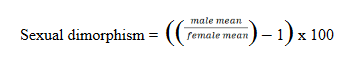

In [ ]:
females = pd.DataFrame()
females = cranmet2[cranmet2['Sex'] == 'F']

In [ ]:
del females['SkelID']
del females['Collection']
del females['Sex']
del females['Age']
del females['Population']
del females['Population2']
del females['Population3']
del females['Population4']

In [ ]:
males = pd.DataFrame()
males = cranmet2[cranmet2['Sex'] == 'M']

In [ ]:
del males['SkelID']
del males['Collection']
del males['Sex']
del males['Age']
del males['Population']
del males['Population2']
del males['Population3']
del males['Population4']

In [ ]:
# performed using males df with NA values
male_mean2 = males.mean()

In [ ]:
male_mean2.head()

GOL    180.558140
NOL    177.348837
BNL    102.782609
BBH    139.844444
XCB    143.553191
dtype: float64

In [ ]:
# performed using males = males.dropna()
male_mean.head()

GOL    179.266667
NOL    176.000000
BNL    101.933333
BBH    140.533333
XCB    143.666667
dtype: float64

In [ ]:
# performed using females = females.dropna()
female_mean = females.mean()
female_mean.head()

GOL    172.888889
NOL    171.055556
BNL     97.000000
BBH    132.944444
XCB    140.388889
dtype: float64

In [ ]:
# performed using males df with NA values
female_mean2 = females.mean()
female_mean2.head()

GOL    172.714286
NOL    171.000000
BNL     96.800000
BBH    133.028571
XCB    139.685714
dtype: float64

In [ ]:
# performed using the dfs with NAs
sexual_dimorphism = ((male_mean2/female_mean2) - 1) * 100
sexual_dimorphism

GOL      4.541520
NOL      3.712770
BNL      6.180381
BBH      5.123616
XCB      2.768699
XFB      2.844266
WFB      1.769941
ZYB      3.962513
ASB      2.208806
BPL      4.976285
NPH      4.023810
NLH      4.738047
JUB      3.089067
NLB      2.180734
MAB      4.971560
MAL      3.808025
MDH      5.860235
OBH     -0.263558
OBB      2.840909
DKB      2.104874
NDS     12.659176
WNB     -3.824084
SIS     21.220449
ZMB      1.403823
SSS     10.663236
FMB      2.940523
NAS     10.482430
EKB      2.540209
DKS      7.607323
IML      4.165063
XML      3.811452
MLS      6.981318
WMH      5.142284
GLS     52.173913
STB      0.528297
FRC      3.400779
FRS     -1.515152
PAC      3.652042
PAS      5.571397
OCC      3.128233
OCS      5.705248
FOL      4.094508
FOB      5.046767
NAR      5.199533
SSR      6.173471
PRR      5.481724
DKR      4.864363
ZOR      4.271437
FMR      4.032194
EKR      4.398987
ZMR      4.090521
AVR      4.169041
BRR      3.572575
VRR      3.353204
LAR      1.852767
OSR      6

In [ ]:
# performed using the DFs with no NAs
sexual_dimorphism = ((male_mean/female_mean) - 1) * 100
sexual_dimorphism

GOL      3.688946
NOL      2.890549
BNL      5.085911
BBH      5.708316
XCB      2.334784
XFB      2.342691
WFB      1.878453
ZYB      2.040816
ASB      2.469136
BPL      5.503830
NPH      0.460683
NLH      2.250804
JUB      2.083333
NLB      4.336283
MAB      6.113074
MAL      5.543710
MDH      5.294118
OBH     -1.308411
OBB      0.549451
DKB      4.739884
NDS     15.862069
WNB     -2.447844
SIS     17.494200
ZMB      0.172712
SSS      7.830189
FMB      1.757225
NAS      5.801527
EKB      1.841197
DKS     -0.518135
IML     -0.168067
XML     -1.761658
MLS      0.952381
WMH      1.428571
GLS     22.000000
STB      0.237389
FRC      2.995461
FRS      2.783726
PAC      7.035491
PAS     16.070529
OCC      1.611805
OCS      2.992126
FOL      4.783307
FOB      5.000000
NAR      4.146789
SSR      5.547445
PRR      5.438202
DKR      2.763338
ZOR      3.123675
FMR      3.018051
EKR      3.322981
ZMR      4.381568
AVR      5.648415
BRR      4.315938
VRR      4.429161
LAR      0.922099
OSR      7

##### Garn Option 1: Function

In [ ]:
# this option uses mean function from statistics

def garn_sexdimorph(females, males):        # create/begin the function
    column1 = list(females.columns)                # take the column names from females df
    stats = ['Trait', '% Sexual Dimorphism']
    sexdimorph_garn_df = pd.DataFrame(columns = stats)

    #my_t_test_df['stats'] = stats
    indx = 0
    for i in range(7, len(column1)):               # for loop starts at column 7 (col 1-6 are demographics) to the end of column1 list (i.e., to the end of the column list)
        #print(column1[i])                         # print the column names
        F1 = females.loc[:, column1[i]]            # iterate through the columns of the females df for each row
        F2 = F1.dropna()                           # drop NaNs through iterative process above
        #print(F1.head())
        M1 = males.loc[:, column1[i]]              # iterate through the columns of the males df for each row
        M2 = M1.dropna()                           # drop NaNs through iterative process above
        #print(M1.head())
        Favg = statistics.mean(F2)
        Mavg = statistics.mean(M2)
        y = (Mavg/Favg - 1) * 100
        #print(ttest_sexdimorph)                   # print the ttest results
        values = []
        #print(y)
        #print(k)
        sexdimorph_garn_df.loc[indx] = [column1[i], y]
        indx += 1                                  # add a row during the iteration
    print(sexdimorph_garn_df.head())
    sexdimorph_garn_df.to_excel('sexdimorph_odont_garn_df.xlsx')     #print output to Excel
garn_sexdimorph(females, males)             # call the function

    Trait  % Sexual Dimorphism
0  UI2_MD             0.856445
1   UC_MD             2.403046
2  UP3_MD             2.072705
3  UP4_MD             1.558501
4  UM1_MD             1.937710


##### Garn Option 2: Calculations
Used this option for dissertation

In [ ]:
# Option 1: no NAs
# this option uses mean function from numpy

column_names = ['Trait Code', '% Sexual Dimorphism']       # since NaNs were replace with zeros, n=45 for every variable
Garnoutput = pd.DataFrame(columns = column_names)
column1 = list(females.columns)
column2 = list(males.columns)
#print(column1)

for i in range(len(column1)):                         # previously: range(7, len(column1)) - to start the loop at column #7
        ob1 = females[column1[i]]
        ob2 = males[column2[i]]
        y1 = np.mean(ob1)
        y2 = np.mean(ob2)
        Garn = (((y2/y1) - 1) * 100)
        print(column1[i], '\t', round(Garn, 5))
        #df2 = {'Trait': column1[i], '% Sexual Dimorphism': round(Garn,5)}
        Garnoutput.loc[i] = [column1[i],  round(Garn,5)]
        #Garnoutput.reset_index(drop=True)
        #Garnoutput.to_excel('sexdimorph_odont_garn_df.xlsx')


GOL 	 3.68895
NOL 	 2.89055
BNL 	 5.08591
BBH 	 5.70832
XCB 	 2.33478
XFB 	 2.34269
WFB 	 1.87845
ZYB 	 2.04082
ASB 	 2.46914
BPL 	 5.50383
NPH 	 0.46068
NLH 	 2.2508
JUB 	 2.08333
NLB 	 4.33628
MAB 	 6.11307
MAL 	 5.54371
MDH 	 5.29412
OBH 	 -1.30841
OBB 	 0.54945
DKB 	 4.73988
NDS 	 15.86207
WNB 	 -2.44784
SIS 	 17.4942
ZMB 	 0.17271
SSS 	 7.83019
FMB 	 1.75723
NAS 	 5.80153
EKB 	 1.8412
DKS 	 -0.51813
IML 	 -0.16807
XML 	 -1.76166
MLS 	 0.95238
WMH 	 1.42857
GLS 	 22.0
STB 	 0.23739
FRC 	 2.99546
FRS 	 2.78373
PAC 	 7.03549
PAS 	 16.07053
OCC 	 1.6118
OCS 	 2.99213
FOL 	 4.78331
FOB 	 5.0
NAR 	 4.14679
SSR 	 5.54745
PRR 	 5.4382
DKR 	 2.76334
ZOR 	 3.12367
FMR 	 3.01805
EKR 	 3.32298
ZMR 	 4.38157
AVR 	 5.64841
BRR 	 4.31594
VRR 	 4.42916
LAR 	 0.9221
OSR 	 7.14286
MOW 	 4.78873
UFBR 	 1.65854
UFHT 	 0.553
NAA 	 2.2408
PRA 	 0.9434
BAA 	 -5.02591
NBA 	 2.00837
BBA 	 -3.1943
BRA 	 0.04854
SSA 	 -2.65625
NFA 	 -0.78238
DKA 	 0.37175
NDA 	 -6.09272
FRA 	 0.29235
PAA 	 -2.88533
OCA 	 -1

In [ ]:
Garnoutput.head()

,Trait Code,% Sexual Dimorphism
0,GOL,3.68895
1,NOL,2.89055
2,BNL,5.08591
3,BBH,5.70832
4,XCB,2.33478


In [ ]:
females.head()

In [ ]:
# Option 1: with NAs
# this option uses mean function from numpy

column_names = ['Trait Code', '% Sexual Dimorphism']       # since NaNs were replace with zeros, n=45 for every variable
Garnoutput2 = pd.DataFrame(columns = column_names)
column1 = list(females.columns)
column2 = list(males.columns)
#print(column1)

for i in range(len(column1)):                         # previously: range(7, len(column1)) - to start the loop at column #7
        ob1 = females[column1[i]]
        ob2 = males[column2[i]]
        y1 = np.mean(ob1)
        y2 = np.mean(ob2)
        Garn = (((y2/y1) - 1) * 100)
        print(column1[i], '\t', round(Garn, 5))
        #df2 = {'Trait': column1[i], '% Sexual Dimorphism': round(Garn,5)}
        Garnoutput2.loc[i] = [column1[i],  round(Garn,5)]
        #Garnoutput2.reset_index(drop=True)
        #Garnoutput2.to_excel('sexdimorph_odont_garn_df.xlsx')


GOL 	 4.54152
NOL 	 3.71277
BNL 	 6.18038
BBH 	 5.12362
XCB 	 2.7687
XFB 	 2.84427
WFB 	 1.76994
ZYB 	 3.96251
ASB 	 2.20881
BPL 	 4.97629
NPH 	 4.02381
NLH 	 4.73805
JUB 	 3.08907
NLB 	 2.18073
MAB 	 4.97156
MAL 	 3.80803
MDH 	 5.86023
OBH 	 -0.26356
OBB 	 2.84091
DKB 	 2.10487
NDS 	 12.65918
WNB 	 -3.82408
SIS 	 21.22045
ZMB 	 1.40382
SSS 	 10.66324
FMB 	 2.94052
NAS 	 10.48243
EKB 	 2.54021
DKS 	 7.60732
IML 	 4.16506
XML 	 3.81145
MLS 	 6.98132
WMH 	 5.14228
GLS 	 52.17391
STB 	 0.5283
FRC 	 3.40078
FRS 	 -1.51515
PAC 	 3.65204
PAS 	 5.5714
OCC 	 3.12823
OCS 	 5.70525
FOL 	 4.09451
FOB 	 5.04677
NAR 	 5.19953
SSR 	 6.17347
PRR 	 5.48172
DKR 	 4.86436
ZOR 	 4.27144
FMR 	 4.03219
EKR 	 4.39899
ZMR 	 4.09052
AVR 	 4.16904
BRR 	 3.57258
VRR 	 3.3532
LAR 	 1.85277
OSR 	 6.18899
MOW 	 1.59363
UFBR 	 2.37801
UFHT 	 3.05467
NAA 	 -0.77414
PRA 	 2.06905
BAA 	 -1.70336
NBA 	 0.47996
BBA 	 -2.13346
BRA 	 1.5696
SSA 	 -3.20944
NFA 	 -1.5319
DKA 	 -0.7952
NDA 	 -5.65918
FRA 	 1.79002
PAA 	 -0.6

In [ ]:
Garnoutput2.head()

,Trait Code,% Sexual Dimorphism
0,GOL,4.54152
1,NOL,3.71277
2,BNL,6.18038
3,BBH,5.12362
4,XCB,2.76870


##### Output file: Garn %SD

In [ ]:
# this option was calculated without NAs in the dfs
Garnoutput.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_SD_Garn_results.xlsx', index=True)

In [ ]:
# this option was calculated with NAs in the dfs
Garnoutput2.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_SD_Garn_withNAs_results.xlsx', index=True)

### Merge SD results

In [ ]:
# this option was calculated with NAs in the dfs
SD_results = pd.merge(my_ind_t_test_df2, Garnoutput2, on='Trait Code')

In [ ]:
# with NAs in the dfs
SD_results.head()

,Trait Code,t-statistic,p-value,% Sexual Dimorphism
0,GOL,-1.760052,0.093248,4.54152
1,NOL,-1.446018,0.163343,3.71277
2,BNL,-2.706210,0.011714,6.18038
3,BBH,-3.857940,0.000617,5.12362
4,XCB,-1.437172,0.160690,2.76870


In [ ]:
# no NAs int he dfs
SD_results.head()

,Trait Code,t-statistic,p-value,% Sexual Dimorphism
0,GOL,-1.853610,0.073333,3.68895
1,NOL,-1.524240,0.137587,2.89055
2,BNL,-2.762421,0.009561,5.08591
3,BBH,-3.911610,0.000467,5.70832
4,XCB,-1.414682,0.167128,2.33478


In [ ]:
SD_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trait Code           72 non-null     object 
 1   t-statistic          72 non-null     float64
 2   p-value              72 non-null     float64
 3   % Sexual Dimorphism  72 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.8+ KB


##### Output file: SD merged results

In [ ]:
SD_results.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_SD_merged_results.xlsx', index=False)

---

# **Intertrait correlations**

### Pearson from d-tale

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

corr_cols = [
	'GOL', 'NOL', 'BNL', 'BBH', 'XCB', 'XFB',
	'WFB', 'ZYB', 'ASB', 'BPL', 'NPH', 'NLH', 'JUB', 'NLB',
	'MAB', 'MAL', 'MDH', 'OBH', 'OBB', 'DKB', 'NDS', 'WNB',
	'SIS', 'ZMB', 'SSS', 'FMB', 'NAS', 'EKB', 'DKS', 'IML',
	'XML', 'MLS', 'WMH', 'GLS', 'STB', 'FRC', 'FRS', 'PAC',
	'PAS', 'OCC', 'OCS', 'FOL', 'FOB', 'NAR', 'SSR', 'PRR',
	'DKR', 'ZOR', 'FMR', 'EKR', 'ZMR', 'AVR', 'BRR', 'VRR',
	'LAR', 'OSR', 'MOW', 'UFBR', 'UFHT', 'NAA', 'PRA', 'BAA',
	'NBA', 'BBA', 'BRA', 'SSA', 'NFA', 'DKA', 'NDA', 'FRA',
	'PAA', 'OCA'
]
corr_data = df[corr_cols]
corr_data = corr_data.corr(method='pearson')
corr_data.index.name = str('column')
corr_data = corr_data.reset_index()

In [ ]:
corr_data

,column,GOL,NOL,BNL,BBH,XCB,XFB,WFB,ZYB,ASB,BPL,NPH,NLH,JUB,NLB,MAB,MAL,MDH,OBH,OBB,DKB,NDS,WNB,SIS,ZMB,SSS,FMB,NAS,EKB,DKS,IML,XML,MLS,WMH,GLS,STB,FRC,FRS,PAC,PAS,OCC,OCS,FOL,FOB,NAR,SSR,PRR,DKR,ZOR,FMR,EKR,ZMR,AVR,BRR,VRR,LAR,OSR,MOW,UFBR,UFHT,NAA,PRA,BAA,NBA,BBA,BRA,SSA,NFA,DKA,NDA,FRA,PAA,OCA
0,GOL,1.000000,0.984285,0.700697,0.593062,0.249895,0.396694,0.432967,0.306977,0.498128,0.467952,0.485925,0.506645,0.349837,-0.003697,0.164227,0.431393,0.296468,0.139044,0.555884,-0.038865,0.420698,0.103081,0.356146,0.097689,0.106754,0.524475,0.485025,0.503283,0.342914,0.551826,0.360696,0.312073,0.350670,0.477482,0.199664,0.630315,0.281400,0.679334,0.301033,0.487271,0.677600,0.433175,0.305711,0.713739,0.607440,0.540718,0.648875,0.632467,0.613806,0.542940,0.613493,0.401640,0.557407,0.621154,0.707860,0.336162,0.132540,0.494694,0.487771,-0.171307,0.171604,0.009286,-0.265871,0.089417,0.252432,-0.068396,-0.377829,-0.224191,-0.354599,0.048400,0.030088,-0.526440
1,NOL,0.984285,1.000000,0.681490,0.566328,0.205609,0.371278,0.432786,0.245574,0.461642,0.445579,0.502573,0.525993,0.317252,-0.026028,0.152215,0.442613,0.243141,0.150364,0.567561,-0.060166,0.409637,0.159550,0.366761,0.065856,0.131759,0.505212,0.538829,0.487074,0.388368,0.553632,0.340733,0.280934,0.334075,0.364620,0.207252,0.636380,0.286405,0.673301,0.295227,0.493037,0.649874,0.415755,0.307925,0.712517,0.602586,0.538679,0.650101,0.621218,0.578737,0.518618,0.592722,0.367353,0.530691,0.601507,0.720108,0.294284,0.135556,0.473497,0.504774,-0.184583,0.160347,0.044872,-0.302339,0.123217,0.254327,-0.103084,-0.443341,-0.274366,-0.357145,0.045339,0.036588,-0.486821
2,BNL,0.700697,0.681490,1.000000,0.743926,0.307624,0.381950,0.456472,0.478380,0.435113,0.700172,0.427766,0.497167,0.485750,0.199670,0.342147,0.501655,0.244691,0.057322,0.554112,0.166277,0.554011,0.238807,0.552508,0.319869,0.230195,0.592132,0.587208,0.627707,0.317276,0.554870,0.474720,0.378713,0.333380,0.415151,0.159351,0.493879,0.094608,0.378520,0.153831,0.497035,0.389860,0.338127,0.295932,0.834295,0.731348,0.681235,0.760926,0.741391,0.688925,0.642345,0.660836,0.416570,0.545379,0.524227,0.475938,0.453246,0.231207,0.550708,0.493088,-0.207389,0.418407,-0.323572,-0.127583,-0.292036,0.564195,-0.095690,-0.470435,-0.188496,-0.366878,0.209380,0.023165,-0.217047
3,BBH,0.593062,0.566328,0.743926,1.000000,0.402969,0.466675,0.346136,0.425686,0.422119,0.405677,0.323332,0.404070,0.428272,0.167486,0.300537,0.407264,0.386011,0.060787,0.478461,0.098266,0.412522,0.166047,0.357211,0.317647,0.135064,0.509516,0.342101,0.531000,0.216774,0.364500,0.359820,0.338863,0.283953,0.384904,0.340401,0.674586,0.308580,0.469094,0.352551,0.544257,0.258736,0.233971,0.265779,0.633152,0.535488,0.517361,0.608676,0.587913,0.575401,0.512982,0.530025,0.449393,0.801906,0.751914,0.439598,0.307354,0.132233,0.451403,0.411382,-0.271204,0.384575,-0.206200,0.321288,-0.280887,-0.104460,-0.015074,-0.229838,-0.098237,-0.298274,0.059077,-0.182794,-0.062867
4,XCB,0.249895,0.205609,0.307624,0.402969,1.000000,0.750305,0.389750,0.560388,0.655781,0.092303,0.199933,0.244762,0.459646,0.316441,0.238572,0.256190,0.454332,0.074005,0.438265,0.109394,0.002570,0.068107,0.108980,0.250921,-0.180104,0.494620,0.115234,0.483246,0.272646,0.422412,0.388315,0.127730,0.266401,0.482465,0.634319,0.403732,0.031695,0.203420,0.412090,0.281924,0.164593,0.108156,0.268759,0.366473,0.165633,0.075767,0.441560,0.353802,0.337433,0.324572,0.352495,0.349012,0.557705,0.609318,0.256584,0.102276,0.149390,0.467818,0.141784,-0.221496,0.199352,0.014065,-0.030534,0.068467,-0.086128,0.268110,0.017461,-0.181717,0.063176,0.218860,-0.427937,-0.086306
5,XFB,0.396694,0.371278,0.381950,0.466675,0.750305,1.000000,0.572299,0.499606,0.601492,0.171565,0.230763,0.237958,0.480867,0.187315,0.224583,0.360011,0.338247,0.129633,0.466721,0.172472,0.155219,0.073975,0.118047,0.238150,-0.100285,0.613649,0.171857,0.578095,0.219288,0.415662,0.296368,0.122314,0.188956,0.437446,0.725460,0.507691,0.108745,0.351953,0.438981,0.322407,0.210435,0.210956,0.1

In [ ]:
corr_data.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_pearsons_correlation.xlsx', index=False)

### Pearson from scipy.stats (don't need)

In [ ]:
from scipy.stats import pearsonr

In [ ]:
cranmet_VarsOnly.head()

In [ ]:
df2 = pd.DataFrame(cranmet_VarsOnly)

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.head()

In [ ]:
corr, _ = pearsonr(df2['GOL'], df2['NOL'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.989


---

# Missing data
Using the df_cranmet (aka cranmet_no_univariate_outliers.xlsx) dataframe, which has had the univariate outliers removed, but the multivariate outliers are still included

In [ ]:
df_cranmet = pd.read_excel('cranmet_no_univariate_outliers.xlsx')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
cranmet_VarsOnly = pd.DataFrame(df_cranmet.iloc[:, 2:74])

In [ ]:
cranmet_VarsOnly.head()

In [ ]:
percent_missing = cranmet_VarsOnly.isnull().sum().sum()*100 / (len(cranmet_VarsOnly) * len(cranmet_VarsOnly.columns))
percent_missing

4.319105691056911

The craniometrics dataset has 4.32% missing data.

In [ ]:
cranmet_VarsOnly.isnull().values.any()

True

In [ ]:
cranmet_VarsOnly.isnull().sum().sum()

255

### Mean imputation

In [ ]:
cranmet_no_univariate_outliers.head()

In [ ]:
#cranmet_no_univariate_outliers['AVR'].describe()

count    67.000000
mean     79.014925
std       4.311691
min      68.000000
25%      76.000000
50%      79.000000
75%      82.000000
max      90.000000
Name: AVR, dtype: float64

In [ ]:
cranmet_no_UV_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       82 non-null     int64  
 1   Collection   82 non-null     object 
 2   GOL          78 non-null     float64
 3   NOL          78 non-null     float64
 4   BNL          81 non-null     float64
 5   BBH          80 non-null     float64
 6   XCB          82 non-null     int64  
 7   XFB          81 non-null     float64
 8   WFB          82 non-null     int64  
 9   ZYB          82 non-null     int64  
 10  ASB          73 non-null     float64
 11  BPL          75 non-null     float64
 12  NPH          74 non-null     float64
 13  NLH          81 non-null     float64
 14  JUB          82 non-null     int64  
 15  NLB          79 non-null     float64
 16  MAB          60 non-null     float64
 17  MAL          74 non-null     float64
 18  MDH          82 non-null     int64  
 19  OBH       

In [ ]:
cranmet_no_UV_outliers = pd.DataFrame(cranmet_no_univariate_outliers.iloc[:,2:74])

In [ ]:
cranmet_no_UV_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     78 non-null     float64
 1   NOL     78 non-null     float64
 2   BNL     81 non-null     float64
 3   BBH     80 non-null     float64
 4   XCB     82 non-null     int64  
 5   XFB     81 non-null     float64
 6   WFB     82 non-null     int64  
 7   ZYB     82 non-null     int64  
 8   ASB     73 non-null     float64
 9   BPL     75 non-null     float64
 10  NPH     74 non-null     float64
 11  NLH     81 non-null     float64
 12  JUB     82 non-null     int64  
 13  NLB     79 non-null     float64
 14  MAB     60 non-null     float64
 15  MAL     74 non-null     float64
 16  MDH     82 non-null     int64  
 17  OBH     81 non-null     float64
 18  OBB     79 non-null     float64
 19  DKB     79 non-null     float64
 20  NDS     72 non-null     float64
 21  WNB     80 non-null     float64
 22  SIS 

In [ ]:
cranmet_mean_imp = pd.DataFrame(cranmet_no_UV_outliers)

In [ ]:
cranmet_mean_imp.head()

In [ ]:
cranmet_mean_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     78 non-null     float64
 1   NOL     78 non-null     float64
 2   BNL     81 non-null     float64
 3   BBH     80 non-null     float64
 4   XCB     82 non-null     int64  
 5   XFB     81 non-null     float64
 6   WFB     82 non-null     int64  
 7   ZYB     82 non-null     int64  
 8   ASB     73 non-null     float64
 9   BPL     75 non-null     float64
 10  NPH     74 non-null     float64
 11  NLH     81 non-null     float64
 12  JUB     82 non-null     int64  
 13  NLB     79 non-null     float64
 14  MAB     60 non-null     float64
 15  MAL     74 non-null     float64
 16  MDH     82 non-null     int64  
 17  OBH     81 non-null     float64
 18  OBB     79 non-null     float64
 19  DKB     79 non-null     float64
 20  NDS     72 non-null     float64
 21  WNB     80 non-null     float64
 22  SIS 

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [ ]:
imputer.fit(cranmet_mean_imp)

SimpleImputer()

In [ ]:
cranmet_mean_imp = imputer.transform(cranmet_mean_imp)          # replace missing values in numeric columns with the average for each column
# the result is a numpy array. So you have to convert it back into a dataframe and then assign column names.

In [ ]:
# save column names from cranmet_VarsOnly df

column_names = cranmet_VarsOnly.columns
print(column_names)

Index(['GOL', 'NOL', 'BNL', 'BBH', 'XCB', 'XFB', 'WFB', 'ZYB', 'ASB', 'BPL', 'NPH', 'NLH', 'JUB', 'NLB', 'MAB', 'MAL', 'MDH', 'OBH', 'OBB', 'DKB', 'NDS', 'WNB', 'SIS', 'ZMB', 'SSS', 'FMB', 'NAS', 'EKB', 'DKS', 'IML', 'XML', 'MLS', 'WMH', 'GLS', 'STB', 'FRC', 'FRS', 'PAC', 'PAS', 'OCC', 'OCS', 'FOL', 'FOB', 'NAR', 'SSR', 'PRR', 'DKR', 'ZOR', 'FMR', 'EKR', 'ZMR', 'AVR', 'BRR', 'VRR', 'LAR', 'OSR', 'MOW', 'UFBR', 'UFHT', 'NAA', 'PRA', 'BAA', 'NBA', 'BBA', 'BRA', 'SSA', 'NFA', 'DKA', 'NDA', 'FRA', 'PAA', 'OCA'], dtype='object')


In [ ]:
print(cranmet_mean_imp)

In [ ]:
cranmet_mean_imp = pd.DataFrame(cranmet_mean_imp)

In [ ]:
# assign column names

cranmet_mean_imp.columns = column_names

In [ ]:
cranmet_mean_imp.head()

In [ ]:
cranmet_mean_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     82 non-null     float64
 1   NOL     82 non-null     float64
 2   BNL     82 non-null     float64
 3   BBH     82 non-null     float64
 4   XCB     82 non-null     float64
 5   XFB     82 non-null     float64
 6   WFB     82 non-null     float64
 7   ZYB     82 non-null     float64
 8   ASB     82 non-null     float64
 9   BPL     82 non-null     float64
 10  NPH     82 non-null     float64
 11  NLH     82 non-null     float64
 12  JUB     82 non-null     float64
 13  NLB     82 non-null     float64
 14  MAB     82 non-null     float64
 15  MAL     82 non-null     float64
 16  MDH     82 non-null     float64
 17  OBH     82 non-null     float64
 18  OBB     82 non-null     float64
 19  DKB     82 non-null     float64
 20  NDS     82 non-null     float64
 21  WNB     82 non-null     float64
 22  SIS 

##### Add demographics

In [ ]:
cranmet.head()

In [ ]:
selected_columns = cranmet[['SkelID', 'Collection', 'Sex', 'Age', 'Population', 'Population2', 'Population3', 'Population4']]
dems2 = selected_columns.copy()
dems2.head(50)

In [ ]:
cranmet_mean_imp = pd.merge(dems2, cranmet_mean_imp, left_index=True, right_index=True)

In [ ]:
cranmet_mean_imp.head()

In [ ]:
cranmet_mean_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       82 non-null     int64  
 1   Collection   82 non-null     object 
 2   Sex          82 non-null     object 
 3   Age          82 non-null     int64  
 4   Population   82 non-null     object 
 5   Population2  10 non-null     object 
 6   Population3  5 non-null      object 
 7   Population4  1 non-null      object 
 8   GOL          82 non-null     float64
 9   NOL          82 non-null     float64
 10  BNL          82 non-null     float64
 11  BBH          82 non-null     float64
 12  XCB          82 non-null     float64
 13  XFB          82 non-null     float64
 14  WFB          82 non-null     float64
 15  ZYB          82 non-null     float64
 16  ASB          82 non-null     float64
 17  BPL          82 non-null     float64
 18  NPH          82 non-null     float64
 19  NLH       

##### Output data file: mean imputation

In [ ]:
cranmet_mean_imp.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_mean_imp.xlsx', index=False)

### k-NN imputation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
cranmet_kNN_imp = pd.DataFrame(cranmet_no_UV_outliers)

In [ ]:
cranmet_kNN_imp.head()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(cranmet_kNN_imp)
cranmet_kNN_imp = imputer.transform(cranmet_kNN_imp)          # replace missing values in numeric columns with the average for each column

In [ ]:
print(cranmet_kNN_imp)

In [ ]:
cranmet_kNN_imp = pd.DataFrame(cranmet_kNN_imp)

In [ ]:
# save column names from cranmet_VarsOnly df

#column_names = cranmet_VarsOnly.columns
print(column_names)

Index(['GOL', 'NOL', 'BNL', 'BBH', 'XCB', 'XFB', 'WFB', 'ZYB', 'ASB', 'BPL', 'NPH', 'NLH', 'JUB', 'NLB', 'MAB', 'MAL', 'MDH', 'OBH', 'OBB', 'DKB', 'NDS', 'WNB', 'SIS', 'ZMB', 'SSS', 'FMB', 'NAS', 'EKB', 'DKS', 'IML', 'XML', 'MLS', 'WMH', 'GLS', 'STB', 'FRC', 'FRS', 'PAC', 'PAS', 'OCC', 'OCS', 'FOL', 'FOB', 'NAR', 'SSR', 'PRR', 'DKR', 'ZOR', 'FMR', 'EKR', 'ZMR', 'AVR', 'BRR', 'VRR', 'LAR', 'OSR', 'MOW', 'UFBR', 'UFHT', 'NAA', 'PRA', 'BAA', 'NBA', 'BBA', 'BRA', 'SSA', 'NFA', 'DKA', 'NDA', 'FRA', 'PAA', 'OCA'], dtype='object')


In [ ]:
# assign column names

cranmet_kNN_imp.columns = column_names

In [ ]:
cranmet_kNN_imp.head()

In [ ]:
cranmet_kNN_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     82 non-null     float64
 1   NOL     82 non-null     float64
 2   BNL     82 non-null     float64
 3   BBH     82 non-null     float64
 4   XCB     82 non-null     float64
 5   XFB     82 non-null     float64
 6   WFB     82 non-null     float64
 7   ZYB     82 non-null     float64
 8   ASB     82 non-null     float64
 9   BPL     82 non-null     float64
 10  NPH     82 non-null     float64
 11  NLH     82 non-null     float64
 12  JUB     82 non-null     float64
 13  NLB     82 non-null     float64
 14  MAB     82 non-null     float64
 15  MAL     82 non-null     float64
 16  MDH     82 non-null     float64
 17  OBH     82 non-null     float64
 18  OBB     82 non-null     float64
 19  DKB     82 non-null     float64
 20  NDS     82 non-null     float64
 21  WNB     82 non-null     float64
 22  SIS 

##### Add demographics

In [ ]:
cranmet.head()

In [ ]:
#selected_columns = cranmet[['SkelID', 'Collection', 'Sex', 'Age', 'Population', 'Population2', 'Population3', 'Population4']]
#dems2 = selected_columns.copy()
dems2.head(50)

In [ ]:
cranmet_kNN_imp = pd.merge(dems2, cranmet_kNN_imp, left_index=True, right_index=True)

In [ ]:
cranmet_kNN_imp.head()

In [ ]:
cranmet_kNN_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       82 non-null     int64  
 1   Collection   82 non-null     object 
 2   Sex          82 non-null     object 
 3   Age          82 non-null     int64  
 4   Population   82 non-null     object 
 5   Population2  10 non-null     object 
 6   Population3  5 non-null      object 
 7   Population4  1 non-null      object 
 8   GOL          82 non-null     float64
 9   NOL          82 non-null     float64
 10  BNL          82 non-null     float64
 11  BBH          82 non-null     float64
 12  XCB          82 non-null     float64
 13  XFB          82 non-null     float64
 14  WFB          82 non-null     float64
 15  ZYB          82 non-null     float64
 16  ASB          82 non-null     float64
 17  BPL          82 non-null     float64
 18  NPH          82 non-null     float64
 19  NLH       

##### Output data file: k-NN imputation

In [ ]:
cranmet_kNN_imp.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_kNN_imp.xlsx', index=False)

### Iterative imputation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
cranmet_iterative_imp = pd.DataFrame(cranmet_no_UV_outliers)

In [ ]:
cranmet_iterative_imp.head()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=200, random_state=0)
imputer.fit(cranmet_iterative_imp)
cranmet_iterative_imp = imputer.transform(cranmet_iterative_imp)

In [ ]:
print(cranmet_iterative_imp)

In [ ]:
cranmet_iterative_imp = pd.DataFrame(cranmet_iterative_imp)

In [ ]:
# save column names from cranmet_VarsOnly df

#column_names = cranmet_VarsOnly.columns
print(column_names)

Index(['GOL', 'NOL', 'BNL', 'BBH', 'XCB', 'XFB', 'WFB', 'ZYB', 'ASB', 'BPL', 'NPH', 'NLH', 'JUB', 'NLB', 'MAB', 'MAL', 'MDH', 'OBH', 'OBB', 'DKB', 'NDS', 'WNB', 'SIS', 'ZMB', 'SSS', 'FMB', 'NAS', 'EKB', 'DKS', 'IML', 'XML', 'MLS', 'WMH', 'GLS', 'STB', 'FRC', 'FRS', 'PAC', 'PAS', 'OCC', 'OCS', 'FOL', 'FOB', 'NAR', 'SSR', 'PRR', 'DKR', 'ZOR', 'FMR', 'EKR', 'ZMR', 'AVR', 'BRR', 'VRR', 'LAR', 'OSR', 'MOW', 'UFBR', 'UFHT', 'NAA', 'PRA', 'BAA', 'NBA', 'BBA', 'BRA', 'SSA', 'NFA', 'DKA', 'NDA', 'FRA', 'PAA', 'OCA'], dtype='object')


In [ ]:
# assign column names

cranmet_iterative_imp.columns = column_names

In [ ]:
cranmet_iterative_imp.head()

In [ ]:
cranmet_iterative_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 72 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOL     82 non-null     float64
 1   NOL     82 non-null     float64
 2   BNL     82 non-null     float64
 3   BBH     82 non-null     float64
 4   XCB     82 non-null     float64
 5   XFB     82 non-null     float64
 6   WFB     82 non-null     float64
 7   ZYB     82 non-null     float64
 8   ASB     82 non-null     float64
 9   BPL     82 non-null     float64
 10  NPH     82 non-null     float64
 11  NLH     82 non-null     float64
 12  JUB     82 non-null     float64
 13  NLB     82 non-null     float64
 14  MAB     82 non-null     float64
 15  MAL     82 non-null     float64
 16  MDH     82 non-null     float64
 17  OBH     82 non-null     float64
 18  OBB     82 non-null     float64
 19  DKB     82 non-null     float64
 20  NDS     82 non-null     float64
 21  WNB     82 non-null     float64
 22  SIS 

##### Add demographics

In [ ]:
cranmet.head()

In [ ]:
#selected_columns = cranmet[['SkelID', 'Collection', 'Sex', 'Age', 'Population', 'Population2', 'Population3', 'Population4']]
#dems2 = selected_columns.copy()
dems2.head(50)

In [ ]:
cranmet_iterative_imp = pd.merge(dems2, cranmet_iterative_imp, left_index=True, right_index=True)

In [ ]:
cranmet_iterative_imp.head()

In [ ]:
cranmet_iterative_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SkelID       82 non-null     int64  
 1   Collection   82 non-null     object 
 2   Sex          82 non-null     object 
 3   Age          82 non-null     int64  
 4   Population   82 non-null     object 
 5   Population2  10 non-null     object 
 6   Population3  5 non-null      object 
 7   Population4  1 non-null      object 
 8   GOL          82 non-null     float64
 9   NOL          82 non-null     float64
 10  BNL          82 non-null     float64
 11  BBH          82 non-null     float64
 12  XCB          82 non-null     float64
 13  XFB          82 non-null     float64
 14  WFB          82 non-null     float64
 15  ZYB          82 non-null     float64
 16  ASB          82 non-null     float64
 17  BPL          82 non-null     float64
 18  NPH          82 non-null     float64
 19  NLH       

##### Output data file: k-NN imputation

In [ ]:
cranmet_iterative_imp.to_excel('/drive/My Drive/Colab Notebooks/Pre-statistical treatments/2_EDA/cranmet_iterative_imp.xlsx', index=False)

# Output data files:
*   *cranmet.xlsx*: This file includes the cranial measurements and demographics
##### **Sex**
*   *cranmet_sex.xlsx*
*   *Comp1_cranmet_sex.xlsx*
*   *Comp2_sex.xlsx*
*   These files contain the numbers of males and females by Collection for each database.
##### **Outliers**
*   *cranmet_no_univariate_outliers.xlsx*: This file includes the entire craniometrics df without univariate outliers. **Use this file for further analyses!**
*   *cranmet_no_outliers.xlsx*: This file includes the entire craniometrics df without univariate outliers. **Maybe use this file for further analyses!**
*   *cranmet_Mahalanobis_outliers.xlsx*: This file includes the US and Japan outliers with D2 and p-values
##### **Normality**
*   *cranmet_US_shapiro_results.xlsx* and *cranmet_Japan_shapiro_results.xlsx*: These files contain the Shapiro-Wilks results for US and Japan separately. The two Shapiro-Wilks results files were merged into one table in excel.
*   *cranmet_females_shapiro_results.xlsx* and *cranmet_males_shapiro_results.xlsx*: These files contain the Shapiro-Wilks results for females and males separately. The two Shapiro-Wilks results files were merged into one table in excel.
*   *cranmet_levene_results.xlsx*: This file contains the females vs. males levene results for homogeneity of variances.
##### **Sexual dimorphism**
*   *cranmet_SD_ind_t-test_results.xlsx*: This file contains the independent t-test results for sexual dimorphism
*   *cranmet_SD_Garn_results.xlsx*: This file contains the Garn (1967) % Sexual Dimorphism (calculated) results
*   *cranmet_SD_merged_results.xlsx*: This file contains the merged results from the independent t-test and the Garn %SD results
##### **Intertrait correlations**
*   *cranmet_pearsons_correlation.xlsx*
##### **Missing data**
*   *cranmet_mean_imp.xlsx*: This file contains the craniometrics dataset with univariate outliers imputed using the variable median and missing values were imputed using variable mean. The measurement variables were rounded to whole numbers in excel.
*   *cranmet_kNN_imp.xlsx*: This file contains the craniometrics dataset with univariate outliers imputed using the variable median and missing values were imputed using the k-NN imputation method (k = 5). The measurement variables were rounded to whole numbers in excel.
*   *cranmet_iterative_imp.xlsx*: This file contains the craniometrics dataset with univariate outliers imputed using the variable median and missing values were imputed using the iterative imputation method (max 200 iterations). The measurement variables were rounded to whole numbers in excel.
